# Understanding Hospital Readmission

![Opera_senza_titolo 2](Opera_senza_titolo%202.jpg)


## Table of contents

1. Introduction
2. Executive summary
3. Data and Methods
4. Expolratory Data Analysis (EDA) 
5. Further consideration
6. Conclusion and Recommendations
7. Annex


## 1. Introduction
Hospital readmission is a problem in healthcare where patients are discharged from the hospital and then readmitted within a certain period of time, often within 30 days of their initial discharge. This is a costly and preventable problem that can negatively impact patients' health outcomes and quality of life. Causes of readmissions include inadequate care during initial hospitalization and poor discharge planning. Patients with chronic conditions, such as heart failure, diabetes, and respiratory disease, are at a particularly high risk of readmission. To reduce readmissions, interventions such as improved care coordination, enhanced patient education, and medication management are implemented. Machine learning and artificial intelligence (AI) algorithms are also used to predict which patients are at the highest risk of readmission and enable healthcare providers to intervene proactively to prevent readmissions.

## 2. Executive summary
Our consulting company has been tasked with helping a hospital group improve their understanding of patient readmissions. We have been given access to ten years' worth of data on patients who were readmitted to the hospital after being discharged. Our goal is to assess whether initial diagnoses, the number of procedures, or other variables could provide insight into the probability of readmission, and to identify those patients who are at a higher risk of readmission so that the hospital can focus their follow-up calls and attention accordingly.

To achieve these objectives, we have prepared a report covering the following:

1. Analysis of the most common primary diagnosis by age group.
2. Exploration of the impact of a diabetes diagnosis on readmission rates.
3. Identification of patient groups that the hospital should focus their follow-up efforts on to better monitor patients with a high probability of readmission.

**The results**<br>
The report begins with a brief overview and cleaning of the data, followed by an explanation of the methodologies employed to extract the most valuable insights. The exploratory data analysis has indicated that:

1. **The primary disease diagnosis that is most frequently observed among different age groups is 'Circulatory'**, except for the 40-50 age group, where 'Other' is the most common diagnosis.

2. Investigation of the readmission rates concerning primary, secondary, and tertiary diagnoses reveals that:
	- **Patients diagnosed with diabetes have a higher readmission rate than those diagnosed with other conditions,** 48% for patients with diabetes against 44% for patients diagnosed with 'Other' diseases.
	- The Chi-square statistical test used to assess the dependence of primary diagnosis on readmission rate revealed that **there was a significant statistical association between primary diagnosis of diabetes and hospital readmission rate.**	
3. The hospital should concentrate its follow-up efforts on patient groups with a high likelihood of readmission, including:
	- **patients in the age range of 60 to 95 years old**
	- **patients diagnosed with diabetic, circulatory and respiratory diseases**
	- According to the machine learning models developed during the analysis, **the features that have the most significant impact on the readmission rate include:**
		- **the number of outpatient visits** in the year before a hospital stay
		- **the number of inpatient visits** in the year before a hospital stay
		- **the number of medications administered** during the hospital stay

**Key Recommandations**<br>
1. Further analysis should be conducted on patient groups identified as having a high probability of readmission to determine the specific factors contributing to their readmission rates.
2. The hospital should implement targeted intervention programs for patients in the identified age group and diagnose diabetic, circulatory, and respiratory diseases to reduce their readmission rates.
3. Evaluate the performance of different machine learning models and identify opportunities for model improvement.
4. Analyze the impact of different hospital policies and practices, such as discharge planning and post-discharge follow-up, on readmission rates.

## 3. Data and Methods
As a company, we have access to a dataset that contains patient information spanning over a period of ten years.([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

**Information in the Dataset**

- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

**Remarks on the data:**<br>
The dataframe contains 25000 rows and 17 columns, with no missing values or duplicate rows. Most of the numeric columns exhibit positive skewness, likely due to a significant number of outliers, which totalled 11181. To prevent the loss of important information during analysis, we retained these outliers.

**Methods**<br>
Our exploratory data analysis involved various methodologies, including data cleaning, data visualization, statistical analysis, and machine learning algorithms. To clean the data, we used Pandas to handle missing values, and outliers, and transform variables as necessary. We also used Scikit-learn tools, such as One-Hot-Encoder, to prepare the data for machine learning algorithms. For visualization, we employed Matplotlib and Seaborn to create various plots, including barplots, lineplots, and heat maps, to identify patterns and relationships. Additionally, we utilized the Pingouin library for statistical analysis, including the Chi-square test to understand relationships between variables. For machine learning, we implemented various algorithms, such as k-Nearest Neighbors, Logistic Regression, and Random Forests, and evaluated the models based on accuracy, precision, recall, F1 score, and cross-validation.

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

## 4. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import time
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, auc, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [2]:
df = pd.read_csv('data/hospital_readmissions.csv')
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14,77,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes
24996,[80-90),2,66,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes
24997,[70-80),5,12,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes
24998,[70-80),2,61,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [4]:
df.isna().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
for column, values in df.iteritems():
    unique_values = values.sort_values().unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'age': ['[40-50)' '[50-60)' '[60-70)' '[70-80)' '[80-90)' '[90-100)']
Unique values in column 'time_in_hospital': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Unique values in column 'n_lab_procedures': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 108 109 111
 113]
Unique values in column 'n_procedures': [0 1 2 3 4 5 6]
Unique values in column 'n_medications': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 68 69 72 75 79]
Unique values in co

In [7]:
num= df.select_dtypes(exclude=['object'])

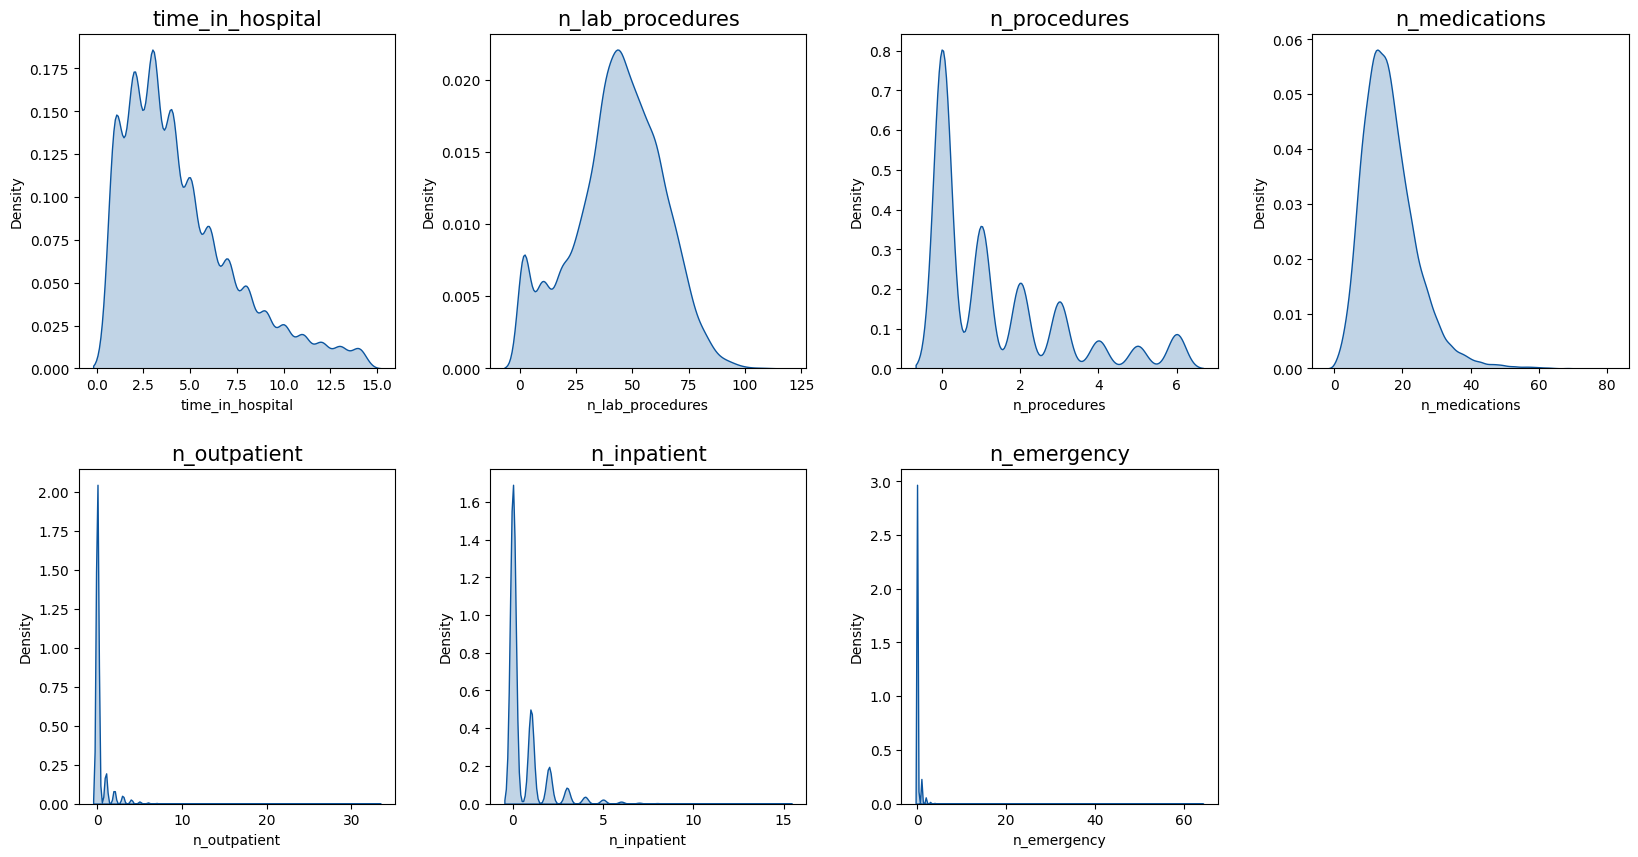

In [8]:
#Plot dataframe distribution
sns.set_palette('Blues_r')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[-1, -1].remove()

for ax, col in zip(axes.flatten(), num.columns):
    sns.kdeplot(num[col], ax=ax, fill=True)
    ax.set_title(col, fontsize=15)
    
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

In [9]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


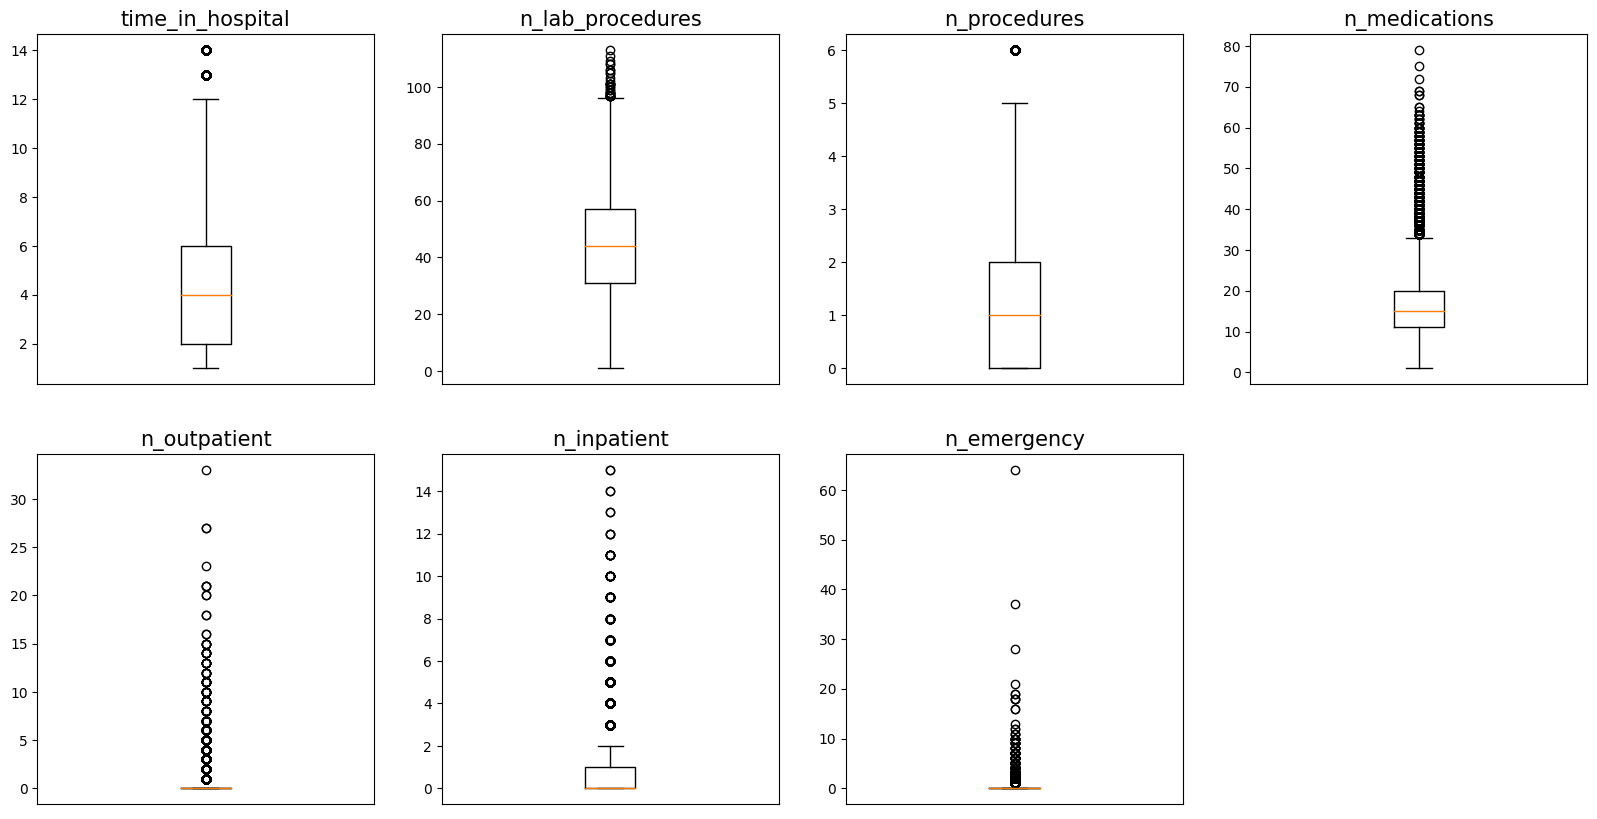

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[-1, -1].remove()
sns.set_palette('bright')

# Iterate over the axes and the columns to fill the subplots with boxplots
for ax, col in zip(axes.flatten(), num.columns):
    ax.boxplot(num[col])
    ax.set_title(col, fontsize=15)
    ax.set_xticks([])

plt.subplots_adjust(hspace=0.2, wspace=0.2)

plt.show()

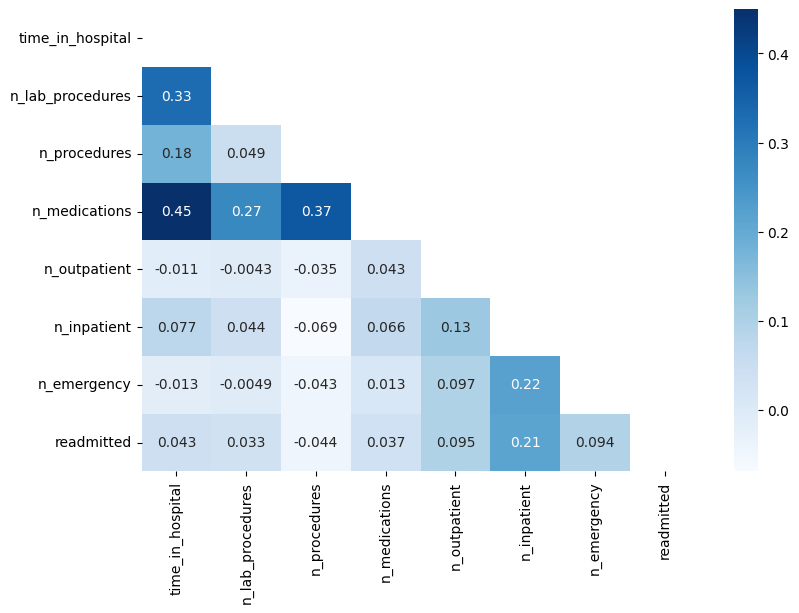

In [11]:
df['readmitted'] = df.readmitted.map({'yes' : 1, 'no' : 0})
corr = df.corr()

#Plot correlation 
fig = plt.figure(figsize=(9, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask)

plt.show()

In [12]:
# Calculate the IQR of the column we want to remove outliers from
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers as 1.5 times the IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = num[(num < lower_bound) | (num > upper_bound)]

# Print the number of outliers
print(f"The total number of outliers is: {outliers.count().sum()}\n\nNumber of outliers in each columns:\n{outliers.count()}") 

The total number of outliers is: 11181

Number of outliers in each columns:
time_in_hospital     580
n_lab_procedures      33
n_procedures        1227
n_medications        844
n_outpatient        4141
n_inpatient         1628
n_emergency         2728
dtype: int64


### 4.1 What is the most common primary diagnosis by age group?

By identifying the most common diseases in each age group, prevention programs and treatments tailored to each age group can be developed. In addition, this can provide useful information for planning healthcare resources and forecasting future healthcare needs.

One effective method to identify the primary diagnosis by age group involves grouping the data frame by 'age' and 'diag_1', followed by creating a pivot table that displays the ranking of diseases diagnosed in each age group. This approach provides a clear and concise overview of the most prevalent diseases in each age group, enabling us to focus on the diseases that are most likely to affect specific age groups. 

In [13]:
print('Table 1: Ranking diesease table by age group.')
age_group = df.groupby(['age', 'diag_1']).size().reset_index(name='counts')

pivot_table = pd.pivot_table(age_group, 
                             index='diag_1', 
                             columns='age', 
                             values='counts').drop('Missing', axis=0).rank(ascending=False, axis=0)


def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''

pivot_table.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)


Table 1: Ranking diesease table by age group.


age,[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
diag_1,,,,,,
Circulatory,2,1,1,1,1,1
Diabetes,4,5,6,6,6,6
Digestive,5,4,4,4,4,4
Injury,6,6,5,5,5,5
Musculoskeletal,7,7,7,7,7,7
Other,1,2,2,2,2,2
Respiratory,3,3,3,3,3,3


According to the table, the green color indicates the most frequent diagnosis by age group. Based on the data, we can conclude the following:
- **'Circulatory' is the most common diagnosis across all age groups except for the 40-50 age group,** where 'Other' is the most common.
- **'Other' is the second most common diagnosis across all age groups except for the 40-50 age group,** where - 'Circulatory' is the second most common.
- **'Respiratory' is the third most common diagnosis across all age groups.**
- **'Digestive' is the fourth most common diagnosis across all age groups except for the 40-50 age group,** where 'Diabetes' is the fourth most common.
- **'Injury' is the fifth most common diagnosis among patients in age ranges between 60 to 100, except for the 40-50 and 50-60 age groups,** where the fifth most common diagnoses are 'Digestive' and 'Diabetes', respectively.
- **'Diabetes' is the sixth most common diagnosis among patients in age ranges between 60 to 100,** except for the 40-60 age group, where the sixth most common diagnosis is 'Injury'.
- **'Musculoskeletal' is the least common diagnosis across all age groups.**

We can also visualise the count of primary diagnoses highlighting in green what has been recognized as the most frequent of the primary diagnoses. 

Figure 1: Count primary diagnosis by age group.


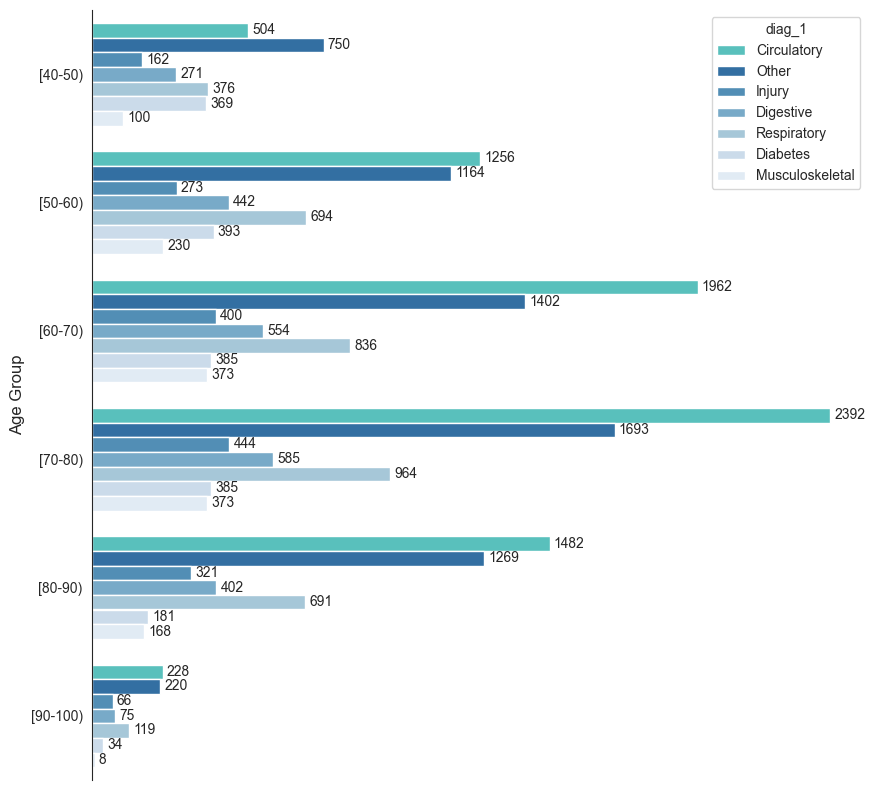

In [14]:
print('Figure 1: Count primary diagnosis by age group.')
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,10))

diagnosis = df[df['diag_1'] != 'Missing']
unique_diags = diagnosis.diag_1.unique()

blues = sns.color_palette('Blues', n_colors=len(unique_diags))
custom_palette = ["mediumturquoise" if diag == "Circulatory"  
                  else blues[len(unique_diags) - 1 - i] 
                  for i, diag in enumerate(unique_diags)]

sns.countplot(y='age', 
              hue='diag_1', 
              order=diagnosis.age.sort_values().unique(), 
              palette=custom_palette, 
              data=diagnosis
             )

for bar in ax.patches:
    width = bar.get_width()
    x = width
    y = bar.get_y() + bar.get_height() / 2
    label = f"{width:.0f}"
    ax.annotate(label, (x, y), 
                ha='left', va='center', 
                xytext=(3, 0), fontsize=10, 
                textcoords='offset points'
               )

sns.despine(bottom=True)
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('')
plt.xticks([])    

plt.show()

**Note:** the category 'Missing' was excluded from the analysis since it contained only 4 values, which were limited to the age groups between 60 to 90, and thus considered insignificant.

### 4.2 Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates.

By comparing readmission rates between patients with diabetes and those without, possible patterns and correlations could be identified to help clarify the relationship between the presence of diabetes and the likelihood of hospital readmission.

To gain a comprehensive view of the relationship between diabetes and readmission, we will group primary, secondary, and tertiary diagnoses of diabetes and calculate readmission rates related to readmitted patients. Then, we will repeat this procedure for other diseases and display the results via a bar graph. In this way, we will be able to easily compare readmission rates across diseases and identify any significant differences.

In [15]:
df['readmitted'] = df.readmitted.map({1 : 'yes', 0 : 'no'})

In [16]:
df_diag_1 = df[df['diag_1'] == 'Diabetes']

table_1 = (df_diag_1['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
           .rename(columns={'index': 'readmitted'})
          )

table_1

,readmitted,readmission_rate
0,yes,54.0
1,no,46.0


In [17]:
df_diag_2 = df[df['diag_2'] == 'Diabetes']

table_2 = (df_diag_2['readmitted']
           .value_counts(normalize=True)
           .mul(100).round()
           .reset_index(name='readmission_rate')
           .rename(columns={'index': 'readmitted'})
          )
                      
table_2

,readmitted,readmission_rate
0,no,56.0
1,yes,44.0


In [18]:
df_diag_3 = df[df['diag_3'] == 'Diabetes']

table_3 = (df_diag_3['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
           .rename(columns={'index': 'readmitted'})
          )

table_3

,readmitted,readmission_rate
0,no,54.0
1,yes,46.0


In [19]:
#Table readmission rate for each of the other diagnoses.
other_diag = df[df.apply(lambda x: 'Diabetes' not in x.values, axis=1)]

other_diag = (other_diag[['readmitted','diag_1','diag_2','diag_3']]
              .melt(id_vars='readmitted',var_name='diag',value_name='diseases')
              .drop('diag',axis=1)
             )

other_readmission = (other_diag.
     groupby('diseases')
     .value_counts(normalize=True)
     .mul(100)
     .round()
     .reset_index(name='readmission_rate')
    )

other_readmission = other_readmission[other_readmission['diseases'] != 'Missing']
other_readmission

,diseases,readmitted,readmission_rate
0,Circulatory,no,51.0
1,Circulatory,yes,49.0
2,Digestive,no,53.0
3,Digestive,yes,47.0
4,Injury,no,58.0
5,Injury,yes,42.0
8,Musculoskeletal,no,56.0
9,Musculoskeletal,yes,44.0
10,Other,no,54.0
11,Other,yes,46.0


In [20]:
#Table readmission rate by other diagnosis
toal_other_readmission = (other_readmission
                          .groupby('readmitted')['readmission_rate']
                          .mean()
                          .reset_index(name='readmission_rate')
                         )
toal_other_readmission

,readmitted,readmission_rate
0,no,53.833333
1,yes,46.166667


In [21]:
#Concat  table_1, table_2, table_3
diabetes_diag = pd.concat([table_1, table_2, table_3])

#Table diabetes_diag
diabetes_diag = pd.DataFrame(diabetes_diag
                                   .groupby('readmitted')['readmission_rate']
                                   .mean()
                                   .reset_index()
                                  )

#Table diabetes_other_diag
diabetes_other_diag = pd.concat([diabetes_diag, toal_other_readmission])

#Filtering fro readmitted = yes
diabetes_other_diag = diabetes_other_diag[diabetes_other_diag['readmitted'] == 'yes']

#Create a new column
diabetes_other_diag['diagnosis'] = ['Diabetes', 'Other']

#Sorting columns
diabetes_other_diag = diabetes_other_diag.reindex(columns=['diagnosis', 'readmitted', 'readmission_rate'])

diabetes_other_diag

,diagnosis,readmitted,readmission_rate
1,Diabetes,yes,48.000000
1,Other,yes,46.166667


Figure 2: Readmission rate by Diabete and Other diagnosises for patients Readmitted.


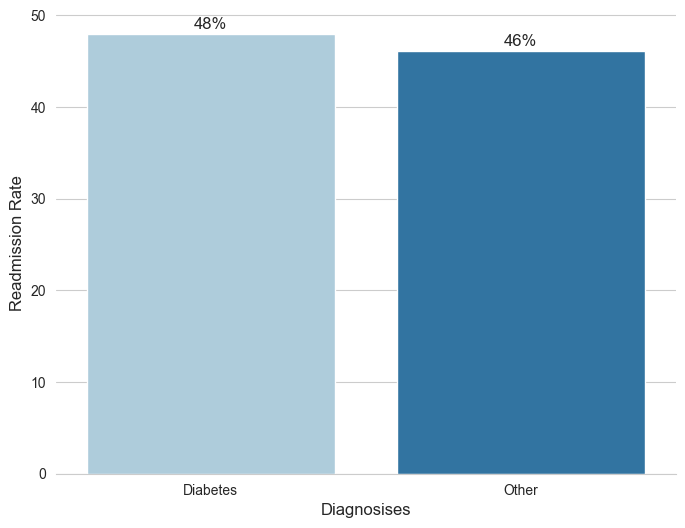

In [22]:
#Plot Readmission Rate by Diabete and Other Diagnosises
print('Figure 2: Readmission rate by Diabete and Other diagnosises for patients Readmitted.')
sns.set_style('whitegrid')
sns.set_palette('Paired')
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x='diagnosis', y='readmission_rate', data=diabetes_other_diag)

for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{height:.0f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', fontsize=12)
        
sns.despine(left=True)
plt.xlabel('Diagnosises', fontsize=12)
plt.ylabel('Readmission Rate', fontsize=12)
plt.show()

From the bar plot above we can colclude that:
- **Diabetes readmitted patients have a readmission rate of 48%.**
- **Readimmited patients with other diseases have a 44% readmission rate.**

It appears that patients diagnosed with diabetes have a higher positive readmission rate than those diagnosed with other conditions.
- But are these data reliable?
- Are they significant, or are they the product of randomness?

In the medical field, the terms primary diagnosis, secondary diagnosis and tertiary diagnosis refer to the classification of a patient's diseases or health problems according to their severity, urgency, and need for treatment.

Since the primary diagnosis is the main diagnosis that the physician makes based on the patient's symptoms, test findings, and information obtained during the medical examination and needs the most medical treatment. While secondary and tertiary diagnoses are additional to the primary diagnoses made by the physician, they may be diseases or health problems related to the primary diagnosis, or they may be other diagnoses made by the physician when the patient has pre-existing medical conditions or conditions that have developed as a result of treatment for the primary diagnosis.

We have decided to focus on the primary diagnosis to perform a statistical test such as the Chi-square test to examine the relationship between a diabetes diagnosis and readmission rate.

- **Null hypothesis:** there is no association between primary diagnosis of diabetes and hospital readmission rate. 

- **Alternative hypothesis:** primary diagnosis of diabetes has an effect on hospital readmission rates. 

- **Treshold:** alpha = 0.05

In [23]:
# Set the p-value threshold to 0.05
alpha = 0.05

# Create a new column 'has_diabetes' indicating whether the primary diagnosis is diabetes
df['has_diabetes'] = df.diag_1.str.contains('Diabetes')

# Perform a chi-squared independence test between 'has_diabetes' and 'readmitted' and obtain the p-value
expected, observed, stats = pg.chi2_independence(data=df, y='has_diabetes', x='readmitted', correction=False)

df.drop('has_diabetes', axis=1, inplace=True)

#Print results
print('    ---------------------------------------    Results Chi-squared test    ---------------------------------------\n')
print(f'The p_value is: {stats.pval.max()} \nIs p_value less than alpha?: {stats.pval.max() < alpha}')


    ---------------------------------------    Results Chi-squared test    ---------------------------------------

The p_value is: 9.417255851416736e-09 
Is p_value less than alpha?: True


The chi-square test result is below the threshold value, this suggests that there is a significant statistical relationship between the primary diagnosis of diabetes and hospital readmission rate. 

The null hypothesis can be rejected in favour of the alternative hypothesis, then we can conclude that:
- **The primary diagnosis of diabetes affects hospital readmission rates.**

In [24]:
#table Readmission vs glucose test 
table_4 = (df
           .groupby('glucose_test')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
          )

table_4

,glucose_test,readmitted,readmission_rate
0,high,yes,52.0
1,high,no,48.0
2,no,no,53.0
3,no,yes,47.0
4,normal,no,52.0
5,normal,yes,48.0


In [25]:
#Table readmission vs AC1 test
table_5 =(df
          .groupby('A1Ctest')['readmitted']
          .value_counts(normalize=True)    
          .mul(100)     
          .round()             
          .reset_index(name='readmission_rate')
         )

table_5

,A1Ctest,readmitted,readmission_rate
0,high,no,54.0
1,high,yes,46.0
2,no,no,53.0
3,no,yes,47.0
4,normal,no,58.0
5,normal,yes,42.0


In [26]:
#Table Readmission vs diabetes medication 
table_6 = (df
           .groupby('diabetes_med')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate') 
          )

table_6

,diabetes_med,readmitted,readmission_rate
0,no,no,59.0
1,no,yes,41.0
2,yes,no,51.0
3,yes,yes,49.0


In [27]:
#Table readmission vs change medication
table_7 = (df
           .groupby('change')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate') 
          )

table_7

,change,readmitted,readmission_rate
0,no,no,55.0
1,no,yes,45.0
2,yes,no,51.0
3,yes,yes,49.0


In [28]:
#Table readmission vs time in hospital
table_8 = (df
           .groupby('time_in_hospital')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
)

table_8

,time_in_hospital,readmitted,readmission_rate
0,1,no,59.0
1,1,yes,41.0
2,2,no,55.0
3,2,yes,45.0
4,3,no,54.0
5,3,yes,46.0
6,4,no,51.0
7,4,yes,49.0
8,5,no,52.0
9,5,yes,48.0


### 4.3 On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

To answer this question, patient data must be analyzed to identify factors that increase the likelihood of readmission. The patient's age, underlying medical condition, and medical history, for example, may all be crucial aspects to consider. Once high-risk patient groups have been identified, the hospital can focus its efforts on patient follow-up and readmission prevention for these patients. This strategy has the potential to improve patient care while also lowering healthcare expenses.

We can use several methodologies, to address this problem.

A line graph could help examine the association between patient age and readmission rates; by comparing it to the average readmission rate, it would be easy to identify groups of patients with the highest readmission rates and focus monitoring efforts on them.

In [29]:
df['readmitted'] = df['readmitted'].map({'yes' : 1, 'no': 0})

tot_mean = round((df.readmitted.mean() * 100))

In [30]:
hp_by_age = (df.groupby('age')['readmitted']
             .mean()
             .mul(100)
             .round()
             .reset_index(name='readmission_rate')
            )

hp_by_age

,age,readmission_rate
0,[40-50),45.0
1,[50-60),44.0
2,[60-70),47.0
3,[70-80),49.0
4,[80-90),50.0
5,[90-100),42.0


Figure 3: Readmission rate by Age Group.


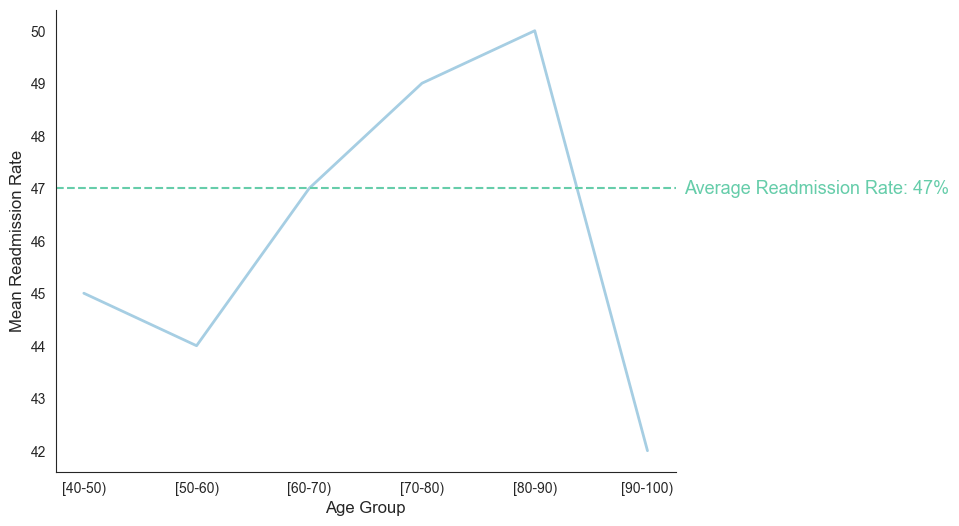

In [31]:
#line plot
print('Figure 3: Readmission rate by Age Group.')
fig = plt.figure(figsize=(8, 6))
sns.set_style('white')
sns.set_palette('Paired')

sns.lineplot(x='age', y='readmission_rate', lw=2, data=hp_by_age)

plt.axhline(y=tot_mean, color='mediumaquamarine', linestyle='--') 

plt.text(6.5, tot_mean, 
         f'Average Readmission Rate: {tot_mean}%', 
         ha='center', va='center', 
         color='mediumaquamarine', fontsize=13  
        )
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Readmission Rate', fontsize=12)
sns.despine()

plt.show()

From the line plot above we can colclude that:
- **Piatients in an age rages between 60 to 95 are over average readmission rate, therefore should be considered like high-risk of readmission.**
- **The minor spike indicates that patients in the age group 50-60 are less subjected to readmission.**
- **The major spike indicates that patients in the age group 80-90 are more subjected to readmission**
- **There is a rapid descent in patients over 90 years old due to their high age**

In [32]:
hp_by_diag = (df[df.diag_1 != "Missing"]
              .groupby('diag_1')['readmitted']
              .mean()
              .mul(100)
              .round()
              .reset_index(name='readmission_rate')
             )

hp_by_diag


,diag_1,readmission_rate
0,Circulatory,48.0
1,Diabetes,54.0
2,Digestive,47.0
3,Injury,44.0
4,Musculoskeletal,40.0
5,Other,45.0
6,Respiratory,49.0


The development of a bar chart comparing readmission rates for each disease with the average readmission rate is an important strategy to identify diseases that require better management, as well as to evaluate the effectiveness of current treatment procedures. With this analysis, it will be possible to focus efforts on diseases that present a higher risk of readmission and, in this way, significantly improve patient outcomes.

Figure 4: Readmission rate by Diagnosis.


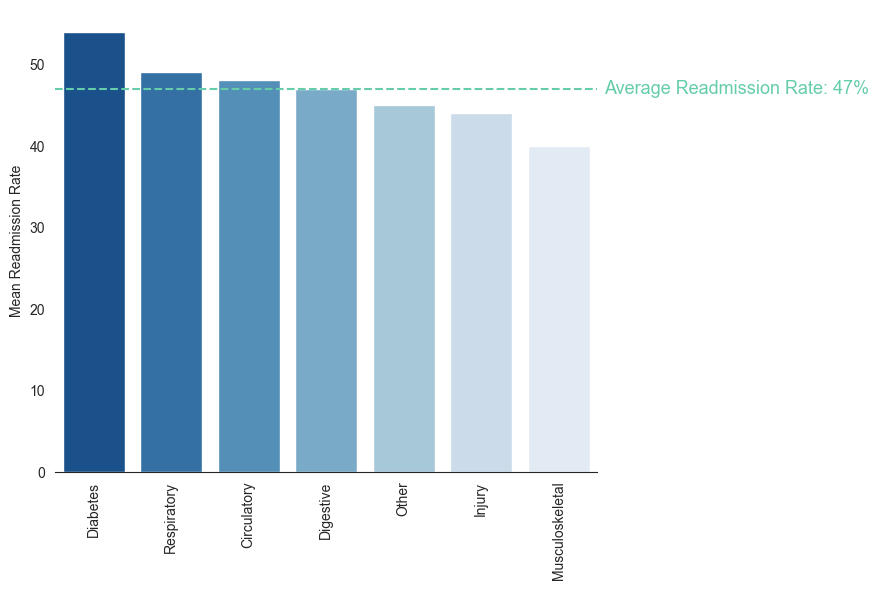

In [33]:
print('Figure 4: Readmission rate by Diagnosis.')
fig = plt.figure(figsize=(7,6))
sns.set_style('white')

sns.barplot(
    y='readmission_rate', 
    x='diag_1', 
    palette='Blues_r', 
    data=hp_by_diag.sort_values('readmission_rate', ascending=False)
)

plt.axhline(y=tot_mean, color='mediumaquamarine', linestyle='--') #

plt.text(
    8.3, tot_mean, 
    f'Average Readmission Rate: {tot_mean}%', 
    ha='center', va='center',
    color='mediumaquamarine', fontsize=13
)

plt.ylabel('Mean Readmission Rate')
plt.xlabel('')
plt.xticks(rotation=90)
sns.despine(left=True)

plt.show()

From the bar plot above we can colclude that:
- **Diabetes is the disease most frequently found to be above the average readmission rate.**
- **Respiratory and Ciruclatory are also above the average readmission rate.**
- **Digestive diseases also to be monitored as they are close to the average readmission rate.**

Another possible solution is to use machine learning algorithms to create predictive models based on patient data, to identify the clinical characteristics that most influence the risk of readmission. Once identify these characteristics, healthcare professionals can focus their monitoring efforts on patients with a higher likelihood of readmission to prevent further hospitalizations. Thus, the availability of machine-learning-based predictive tools enables health professionals to take a more targeted and efficient approach to care management for vulnerable patients.

The case of hospital readmissions can be treated as a binary classification problem. The goal is to predict whether a patient will be readmitted to the hospital within a specified period (e.g., within 30 days of discharge). The target variable in this case can be specified as a binary variable, with "1" representing the positive class (patient readmitted) and "0" representing the negative class (patient not readmitted).

A wide range of machine learning algorithms can be used to solve the problem, we will use:

- Nonlinear classification methods, such as the k-nearest-neighbors method. The K-NeighborsClassifier uses a distance function to determine the k neighbors most similar to the instance to be classified and assigns the instance to the most common class among the neighbors.
- Linear classification techniques, such as LogisticRegression, which use a logistic function to predict the probability that an instance belongs to one of two classes.
- Decision tree algorithms can be used to simulate more complex interactions between input factors and the target variable. RandomForestClassifier is a machine-learning model built from a collection of decision trees, each of which is trained on a different subset of training data. The program averages the predictions of all the trees to provide a final prediction.

To evaluate the performance of machine learning models, we will use various metrics, such as accuracy, precision, recall, and F1 score.
- Accuracy reflects the percentage of correct predictions of the model.
- Precision is the percentage of correct positive predictions made by the model out of all positive predictions made by the model.
- Recall is the percentage of correct positive predictions out of the total true positives in the data set.
- F1 score is the harmonic mean of accuracy and recall.
The ROC-AUC (Area Under the Receiver Operating Characteristic Curve) and PR-AUC (Area Under the Precision Recall Curve) can be used to evaluate the discriminative abilities of the model.

In [34]:
seed = 217

df['readmitted'] = df.readmitted.replace({'yes': 1, 'no' : 0})

X = df.drop('readmitted', axis=1)
y = df.readmitted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

num_selector = make_column_selector(dtype_exclude='object')
cat_selector = make_column_selector(dtype_include='object')

num_cols = num_selector(X)
cat_cols = cat_selector(X)

num_preprocessor = StandardScaler()
cat_preprocessor = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('StandardScaler', num_preprocessor, num_cols),
    ('One Hot Encoder', cat_preprocessor, cat_cols)
])

pipelines = {'K-Neighbors Classifier' : make_pipeline(preprocessor, KNeighborsClassifier()),
             'Logistic Regression' : make_pipeline(preprocessor, LogisticRegression(random_state=seed)),
             'Random Forest Classifier' : make_pipeline(preprocessor, RandomForestClassifier(random_state=seed))}


In [35]:
#Function to get models metrics
def metrics_from_pipes(pipes_dict):
    ''' 
    This function takes as input a dictionary of ML pipilines  and
    returns a table all the train and test metrics for
    each model in the dictionary
    '''
    train_accs = []
    train_f1s = []
    train_roc_aucs = []
    train_pr_aucs = []
    train_precs = []
    train_recs = []
    train_specs = []
    train_fprs_list = []
    train_fnrs_list = []

    test_accs = []
    test_f1s = []
    test_roc_aucs = []
    test_pr_aucs = []
    test_precs = []
    test_recs = []
    test_specs = []
    test_fprs_list = []
    test_fnrs_list = []

    for name, pipeline in pipes_dict.items():
        pipeline.fit(X_train, y_train)
        y_pred_test = pipeline.predict(X_test)
        y_pred_train = pipeline.predict(X_train)
        
        y_probs_test = pipeline.predict_proba(X_test)[:,1]
        y_probs_train = pipeline.predict_proba(X_train)[:,1]
        
        train_precisions, train_recalls, threshold = precision_recall_curve(y_train, y_probs_train)
        test_precisions, test_recalls, threshold = precision_recall_curve(y_test, y_probs_test)
        
        tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
        tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()
        
        train_accs.append(accuracy_score(y_train, y_pred_train))
        train_f1s.append(f1_score(y_train, y_pred_train))
        train_roc_aucs.append(roc_auc_score(y_train, y_probs_train))
        train_pr_aucs.append(auc(train_recalls, train_precisions))
        train_precs.append(precision_score(y_train, y_pred_train))
        train_recs.append(recall_score(y_train, y_pred_train))
        train_specs.append(tn_train / (tn_train + fp_train))
        train_fprs_list.append(fp_train / (fp_train + tn_train))
        train_fnrs_list.append(fn_train / (fn_train + tp_train))    

        test_accs.append(accuracy_score(y_test, y_pred_test))
        test_f1s.append(f1_score(y_test, y_pred_test))
        test_roc_aucs.append(roc_auc_score(y_test, y_probs_test))
        test_pr_aucs.append(auc(test_recalls, test_precisions))
        test_precs.append(precision_score(y_test, y_pred_test))
        test_recs.append(recall_score(y_test, y_pred_test))
        test_specs.append(tn_test / (tn_test + fp_test))
        test_fprs_list.append(fp_test / (fp_test + tn_test))
        test_fnrs_list.append(fn_test / (fn_test + tp_test))

    # aggregate the performance metric lists into seperate dataframes
    train_metrics = pd.DataFrame(
        {'model': pipes_dict.keys(),
         'accuracy': train_accs,
         'f1_score': train_f1s,
         'roc_auc': train_roc_aucs,
         'pr_auc': train_pr_aucs,
         'precision': train_precs,
         'recall': train_recs,
         'specificity': train_specs,
         'false_positive_rate': train_fprs_list,
         'false_negative_rate': train_fnrs_list})

    test_metrics = pd.DataFrame(
        {'model': pipes_dict.keys(),
         'accuracy': test_accs,
         'f1_score': test_f1s,
         'roc_auc': test_roc_aucs,
         'pr_auc': test_pr_aucs,
         'precision': test_precs,
         'recall': test_recs,
         'specificity': test_specs,
         'false_positive_rate': test_fprs_list,
         'false_negative_rate': test_fnrs_list})
    
    #Merging metrics from train and test set
    train_test_metrics = train_metrics.merge(test_metrics, 
                                             on='model', 
                                             how='left',
                                             suffixes=('_train', '_test'))

    #Sorting coulmns
    train_test_metrics = train_test_metrics.reindex(columns=['model',
                                                             'accuracy_train', 
                                                             'accuracy_test',
                                                             'f1_score_train', 
                                                             'f1_score_test',
                                                             'roc_auc_train',
                                                             'roc_auc_test',
                                                             'pr_auc_train',
                                                             'pr_auc_test',
                                                             'precision_train', 
                                                             'precision_test',
                                                             'recall_train', 
                                                             'recall_test',
                                                             'specificity_train', 
                                                             'specificity_test',
                                                             'false_positive_rate_train', 
                                                             'false_positive_rate_test',
                                                             'false_negative_rate_train', 
                                                             'false_negative_rate_test'])

    return train_test_metrics.set_index('model').transpose()

#Getting metrics_table
metrics_table = metrics_from_pipes(pipelines)
print('Table 2: Base models metrics table.')
metrics_table.style.background_gradient(cmap='Blues')

Table 2: Base models metrics table.


model,K-Neighbors Classifier,Logistic Regression,Random Forest Classifier
accuracy_train,0.719700,0.611850,1.000000
accuracy_test,0.563000,0.616400,0.607000
f1_score_train,0.687235,0.495155,1.000000
f1_score_test,0.513904,0.510465,0.550240
roc_auc_train,0.789591,0.649812,1.000000
roc_auc_test,0.586932,0.653624,0.643034
pr_auc_train,0.790973,0.624790,1.000000
pr_auc_test,0.563280,0.630204,0.608185
precision_train,0.722802,0.637261,1.000000
precision_test,0.538713,0.638162,0.595639


Table 2 display the scoring metrics of all three of our Machine Learning models. Analyzing the data, we can see that the Random Forest Classifier is suffering from overfitting, which means that the model has stored the training data too well, adapting too much to the specific features of this data and thus becoming unable to generalize to the new data. This can be seen from the fact that all scoring metrics scored perfect in the training set, while scoring significantly lower in the test set. This is an important sign that the model is unable to generalize well to new data, thus making it unreliable for real-life use.

On the other hand, the K-Neighbors Classifier showed a small discrepancy between train and test set scores, indicating that the model may be prone to overfitting and not generalize well on new data. However, this difference is quite small, so the model may still be useful for our analysis.

Finally, the Logistic Regression model scored almost identically in both data sets, making it the best candidate to pursue our analysis. This indicates that the model has learned to generalize well to the relationships between variables in the problem and could be reliable for real-life use.

Figure 5: Cross-Validation performance for K-Neighbors Classifier, Logistic Regression, Random Forest Classifier.


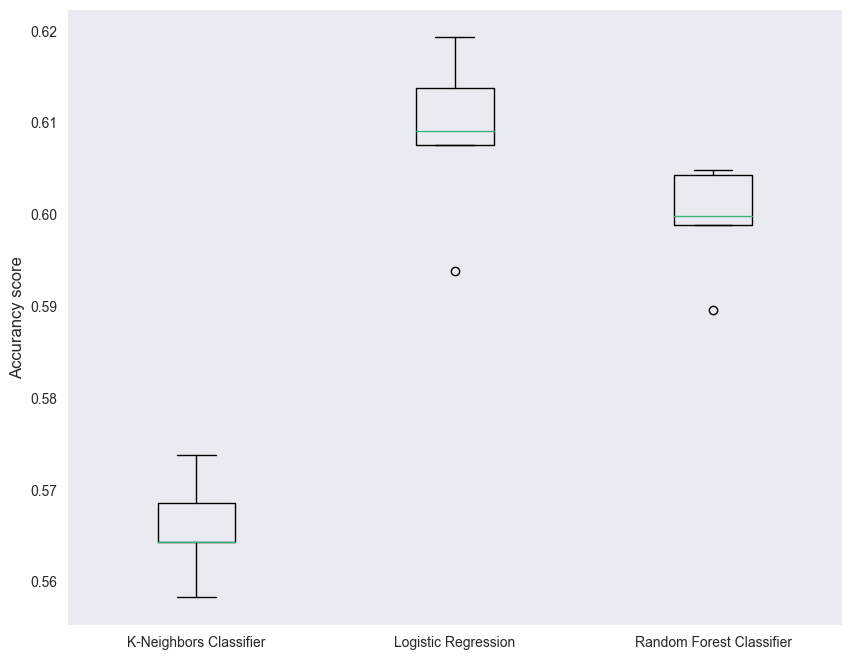


------------------------------------------------------------------
K-Neighbors Classifier Test Set Accuracy: 0.563
Logistic Regression Test Set Accuracy: 0.6164
Random Forest Classifier Test Set Accuracy: 0.607


In [36]:
# Evaluating multiple models
def boxplot_cv_perfomances_from_pipes(pipelines_dict):
    results = []

    for pipeline in pipelines_dict.values():
        kf = KFold(n_splits=5)
        cv_results = cross_val_score(pipeline, X_train, y_train, cv=kf)
        results.append(cv_results)

    #Plot Cross-Validation Performance
    sns.set_style('dark')
    fig = plt.figure(figsize=(10,8))
    plt.boxplot(results, labels=pipelines.keys(), medianprops={'color': 'mediumseagreen'})
    plt.ylabel('Accurancy score', fontsize=12)
    #plt.title('Cross-Validation Performance for Three Models:\n KNN, Logistic Regression, and Random Forest Classifier')

    plt.show()

    print('\n------------------------------------------------------------------')

    #test set performance
    for name, pipeline in pipelines_dict.items():
        pipeline.fit(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)
        print(f"{name} Test Set Accuracy: {test_score}")

print('Figure 5: Cross-Validation performance for K-Neighbors Classifier, Logistic Regression, Random Forest Classifier.')
boxplot_cv_perfomances_from_pipes(pipelines)

As mentioned above, we can use different metrics to evaluate the performance of our model. 

Figure 5 represents the distribution of accuracy scores (percentage of correct predictions) obtained by cross-validation, which divides the data set into several folders, using one folder as the validation set and the others as the training set. This process is repeated for each folder and finally, the results are combined, such as by calculating the mean, to obtain an estimate of the model performance. We can visually see what was expressed in table 2 confirming that Logistic regression has the best performance.  

Another way is to use the ROC-AUC and PR-AUC curves to measure the ability of a classification model to discriminate between two classes, but they focus on different aspects. 

The ROC curve represents the model's ability to discriminate between positive and negative classes. The ROC curve shows the relationship between the True Positive Rate (TPR), which is the percentage of true positives classified correctly to total positives, on the y-axis and the False Positive Rate (FPR), which is the percentage of false positives classified incorrectly to total negatives, on the x-axis. To create the curve, the model's classification threshold, which determines the cut-off point between positive and negative classes, is varied. At each threshold value, the corresponding TPR and FPR value is calculated and a point is drawn on the ROC curve. An ideal ROC curve should get as close as possible to the upper left side of the graph, indicating a high TPR and low FPR. The closer the ROC AUC value is to 1, the better the model's ability to distinguish between the two classes.

On the other hand, the PR curve represents the trade-off between Precision and Recall, highlighting the model's ability to find all positives (Recall) and classify them correctly (Precision), but does not account for negatives. The PR curve is obtained by plotting Precision on the y-axis and Recall on the x-axis. To construct the curve, one starts with the highest recall value 1 and calculates the corresponding precision. Then, you move to the right along the x-axis (i.e., decrease the recall value) and calculate the corresponding precision. You repeat the process until you arrive at the lowest recall value 0. An ideal PR curve should come as close as possible to the upper right side of the graph, indicating high Precision and high Recall.

Figure 6 below demonstrates that although all models performed better than the base rate, the worst-performing model concerning the ROC-AUC and PR-AUC metrics is K-Neighbors Classifier. Therefore we decided to perform Hyperparameter tuning Logistic Regression to see if we are able to obtain better performance.

Figure 6: Test set area under the ROC curve and PR curve


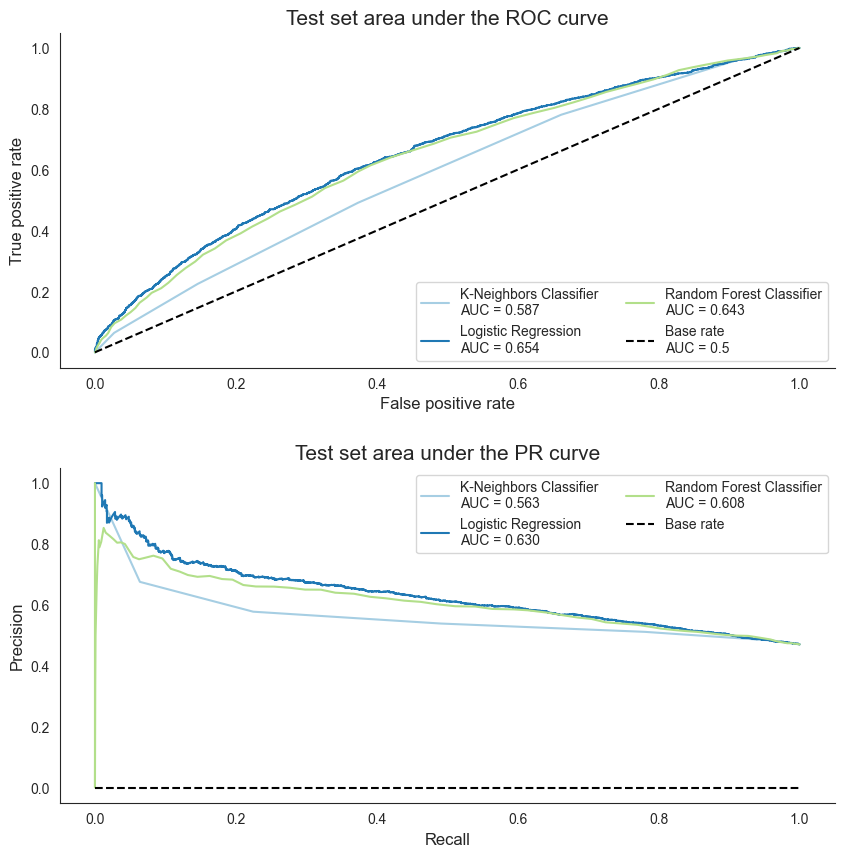

In [37]:
def roc_pr_auc_curves_from_pipes(pipes_dict):
    fprss = []
    tprss = []
    precs = []
    recs = []
    roc_aucs = []
    pr_aucs = []
    
    for name, pipeline in pipes_dict.items():
        y_probs = pipeline.predict_proba(X_test)[:,1]
        
        fprs, tprs, _ = roc_curve(y_test, y_probs)
        precisions, recalls, _ = precision_recall_curve(y_test, y_probs)
        
        fprss.append(fprs)
        tprss.append(tprs)
        precs.append(precisions)
        recs.append(recalls)
        roc_aucs.append(roc_auc_score(y_test, y_probs))
        pr_aucs.append(auc(recalls, precisions))
        
    sns.set_style('white')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

    for i in range(len(fprss)):
        model_name = list(pipes_dict.keys())[i]
        label_model = f"{model_name}\nAUC = {roc_aucs[i]:.3f}"
        ax1.plot(fprss[i], tprss[i], label=label_model)
    ax1.plot([0,1], [0,1], linestyle='--', label='Base rate\nAUC = 0.5', color='black')
    ax1.set_xlabel('False positive rate', fontsize=12)
    ax1.set_ylabel('True positive rate', fontsize=12)
    ax1.set_title('Test set area under the ROC curve', fontsize=15)
    ax1.legend(loc="lower right", bbox_to_anchor=(1, 0), ncol=2, frameon=True)
    
    for i in range(len(precs)):
        model_name = list(pipes_dict.keys())[i]
        label_model = f"{model_name}\nAUC = {pr_aucs[i]:.3f}"
        ax2.plot(recs[i], precs[i], label=label_model)
    ax2.plot([0,1], [0,0], linestyle='--', label='Base rate', color='black')
    ax2.set_xlabel('Recall', fontsize=12)
    ax2.set_ylabel('Precision', fontsize=12)
    ax2.set_title('Test set area under the PR curve', fontsize=15)
    ax2.legend(loc="upper right", bbox_to_anchor=(1, 1), ncol=2, frameon=True)
    plt.subplots_adjust(hspace=0.3)
    sns.despine()

print('Figure 6: Test set area under the ROC curve and PR curve')
roc_pr_auc_curves_from_pipes(pipelines)

In [38]:
start_time = time.time()
param_grid = {'logisticregression__solver': ['libliear', 'sag', 'saga'],
              'logisticregression__penalty' : ['l1', 'l2'],
              'logisticregression__C' : [0.1, 1.0, 10],
              'logisticregression__class_weight' : [None, 'balanced'],
              'logisticregression__max_iter' : [100, 400, 800]}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

grid_lr= GridSearchCV(estimator=pipelines['Logistic Regression'],
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=cv,
                            n_jobs=-1)

grid_lr.fit(X_train, y_train)

end_time = time.time()
execution_time = (end_time - start_time)/60

print(f'The best estimator is: {grid_lr.best_estimator_}\n'
      f'The best params are: {grid_lr.best_params_}\n'
      f'The best score is: {grid_lr.best_score_}\n'
      f'Execution time: {execution_time:.3f} minutes')

The best estimator is: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  ['time_in_hospital',
                                                   'n_lab_procedures',
                                                   'n_procedures',
                                                   'n_medications',
                                                   'n_outpatient',
                                                   'n_inpatient',
                                                   'n_emergency']),
                                                 ('One Hot Encoder',
                                                  OneHotEncoder(),
                                                  ['age', 'medical_specialty',
                                                   'diag_1', 'diag_2', 'diag_3',
                             

The final algorithm, optimized through the use of GridSearchCV, was evaluated on the test data (Table 3, Figure 7) and shown to have:
- an accuracy of 61.8%,
- an area under the precision-recall curve (PR_AUC) of 63.0% ,
- an area under the receiver operating characteristic curve (ROC_AUC) of 65.3%. 

These results indicate that **the algorithm can distinguish between readmitted and non-readmitted patients with a probability between 63.0% and 65.3%,** depending on the chosen metric. 

In addition, the algorithm **correctly classified 1,185 readmitted patients (true positives) and 1,907 non-readmitted patients (true negatives)** out of a total of 5,000 patients in the test set. However, the algorithm also made errors, with **1,166 readmitted patients misclassified as not readmitted (type I errors) and 742 non-readmitted patients misclassified as readmitted (type II errors),** as highlighted in Figure 8.

In [39]:
#Function to get metrics from tuned model
def metrics_test_from_tuned(model):
    ''' This function take as input a hyperparameter model 
    (i.e GridSerachCV, RandomizedSearchCV) and
    returns a table all the test metrics
    '''
    test_accs = []
    test_f1s = []
    test_roc_aucs = []
    test_pr_aucs = []
    test_precs = []
    test_recs = []
    test_specs = []
    test_fprs_list = []
    test_fnrs_list = []
    
    mod = model.best_estimator_
    y_pred_test = mod.predict(X_test)
        
    y_probs_test = mod.predict_proba(X_test)[:,1]
        
    test_precisions, test_recalls, threshold = precision_recall_curve(y_test, y_probs_test)
        
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()  

    test_accs.append(accuracy_score(y_test, y_pred_test))
    test_f1s.append(f1_score(y_test, y_pred_test))
    test_roc_aucs.append(roc_auc_score(y_test, y_probs_test))
    test_pr_aucs.append(auc(test_recalls, test_precisions))
    test_precs.append(precision_score(y_test, y_pred_test))
    test_recs.append(recall_score(y_test, y_pred_test))
    test_specs.append(tn_test / (tn_test + fp_test))
    test_fprs_list.append(fp_test / (fp_test + tn_test))
    test_fnrs_list.append(fn_test / (fn_test + tp_test))

    test_metrics = pd.DataFrame(
        {'model': [model.best_estimator_.steps[-1][1].__class__.__name__],
         'accuracy': test_accs,
         'f1_score': test_f1s,
         'roc_auc': test_roc_aucs,
         'pr_auc': test_pr_aucs,
         'precision': test_precs,
         'recall': test_recs,
         'specificity': test_specs,
         'false_positive_rate': test_fprs_list,
         'false_negative_rate': test_fnrs_list})

    return test_metrics.transpose().reset_index().rename(columns={'index': 'metrics', 0: 'values'})

#Getting metrics_table
metrics_table = metrics_test_from_tuned(grid_lr)
print('Table 3: Best estimator metrics table.')
metrics_table

Table 3: Best estimator metrics table.


,metrics,values
0,model,LogisticRegression
1,accuracy,0.6184
2,f1_score,0.553997
3,roc_auc,0.65397
4,pr_auc,0.630449
5,precision,0.614946
6,recall,0.504041
7,specificity,0.719894
8,false_positive_rate,0.280106
9,false_negative_rate,0.495959


Figure 7: Best model ROC and PR curves


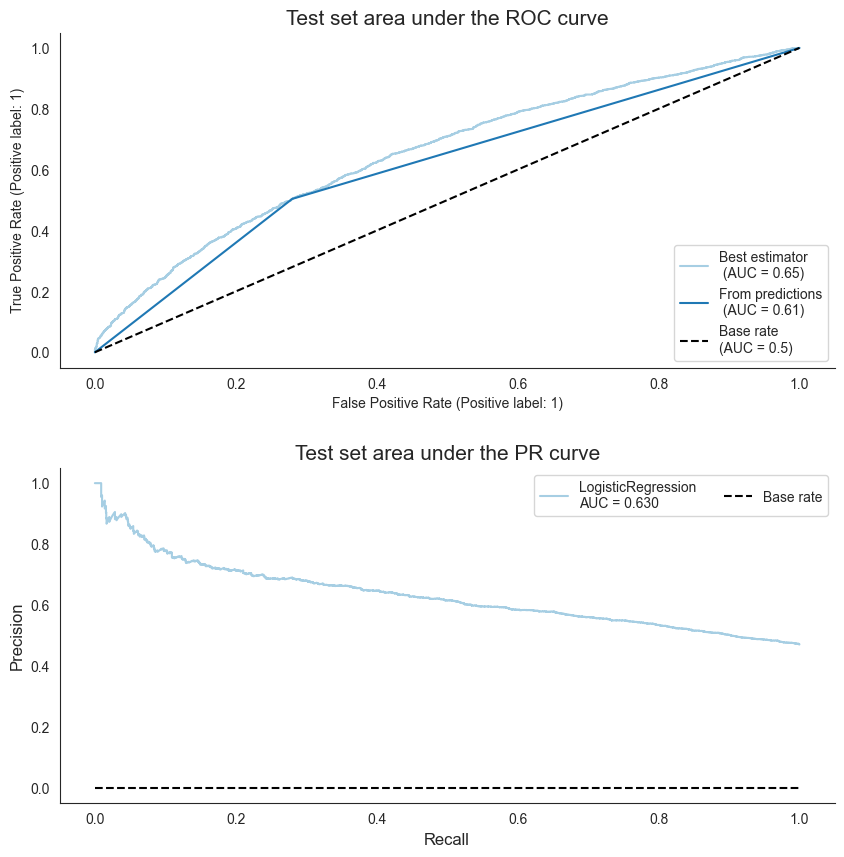

In [40]:
#Plot roc_pr_auc curves from best estimator
def roc_pr_auc_curves_from_best_estimator(model):
    '''This function takes as input an hyperparameter model and
    returns best estimator ROC_PR AUC curves'''
    precs = []
    recs = []
    pr_aucs = []

    mod = model.best_estimator_
    y_pred = model.predict(X_test)
    y_probs = mod.predict_proba(X_test)[:, 1]

    precisions, recalls, _ = precision_recall_curve(y_test, y_probs)
    precs.append(precisions)
    recs.append(recalls)
    pr_aucs.append(auc(recalls, precisions))

    sns.set_style('white')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    roc_best_estimator = RocCurveDisplay.from_estimator(mod, X_test, y_test, name='Best estimator\n', ax=ax1)
    roc_from_predictions = RocCurveDisplay.from_predictions(y_test, y_pred, name='From predictions\n', ax=ax1)
    ax1.plot([0, 1], ls="--", color='k', label='Base rate\n(AUC = 0.5)')
    ax1.set_title('Test set area under the ROC curve', fontsize=15)
    ax1.legend(loc='lower right', bbox_to_anchor=(1,0))
    sns.despine()

    for i in range(len(precs)):
        model_name = model.best_estimator_.steps[-1][1].__class__.__name__
        label_model = f"{model_name}\nAUC = {pr_aucs[i]:.3f}"
        ax2.plot(recs[i], precs[i], label=label_model)
    ax2.plot([0, 1], [0, 0], linestyle='--', label='Base rate', color='black')
    ax2.set_xlabel('Recall', fontsize=12)
    ax2.set_ylabel('Precision', fontsize=12)
    ax2.set_title('Test set area under the PR curve', fontsize=15)
    ax2.legend(loc="upper right", bbox_to_anchor=(1, 1), ncol=2, frameon=True)
    plt.subplots_adjust(hspace=0.3)
    sns.despine()

print('Figure 7: Best model ROC and PR curves')
roc_pr_auc_curves_from_best_estimator(grid_lr)

**Note:** The difference between the two AUC (Area Under the Curve) might indicate that the better model performs slightly better on the test set than its predictions alone (y_pred). However, the 4% difference between the two AUCs is not very large and may not be statistically significant.

Figure 8: GridSearchCV best estimator (Logistic Regression) confusion matrix.


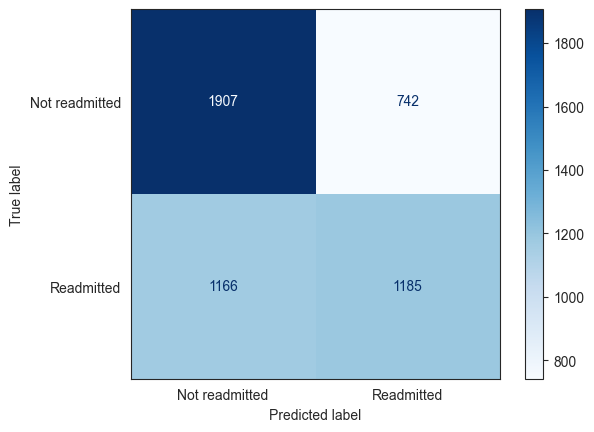

In [41]:
#Predict target variable using the best estimator
y_pred_grid_lr = grid_lr.predict(X_test)

#Create a Confusion Matrix Display object
cm =ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_grid_lr),
                          display_labels=['Not readmitted', 'Readmitted'])

print('Figure 8: GridSearchCV best estimator (Logistic Regression) confusion matrix.')
cm.plot(cmap='Blues')
plt.show()

Figure 9 displays which feature affects the performance of the machine learning model, indicating how much a feature contributes to the model's ability to make accurate predictions.

Evaluating feature performances is important because it can help identify which features are most important for prediction and which can be eliminated or modified to improve model performance. In addition, understanding feature performances can help to better understand the nature of the classification problem and identify the variables that are most significant for prediction.

Figure 9: GridSearchCV best estimator (Logistic Regression) coefficient impotances.


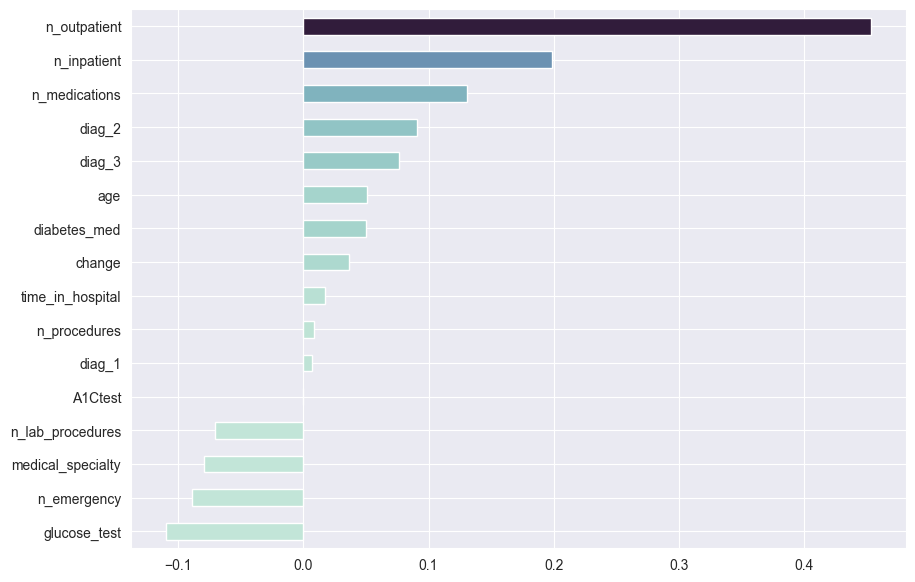

In [42]:
print('Figure 9: GridSearchCV best estimator (Logistic Regression) coefficient importances.')
coeffs = grid_lr.best_estimator_.named_steps.logisticregression.coef_[0]

importances_model = pd.Series(coeffs[:len(X.columns)],
                              index = X
                              .columns[:len(coeffs[:len(X.columns)])]).sort_values()  

#Plot  LogisticRegression coefficients
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,7))
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

importances_model.plot(kind='barh', color=palette(importances_model/float(importances_model.max())))
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features importances', fontsize=12)

plt.show()

We can conclude that the features that most affect our model are:
- **the number of outpatient visits** in the year before a hospital stay
- **the number of inpatient visits** in the year before a hospital stay
- **number of medications administered** during the hospital stay
    

## 5. Further consideration

Figure 10: Readmission rates by each Diabetes Diagnosis.


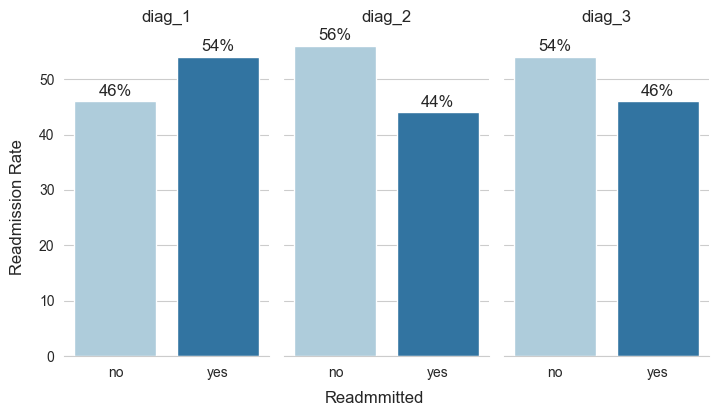

In [43]:
print('Figure 10: Readmission rates by each Diabetes Diagnosis.')
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(7, 4))

for i, table in enumerate([table_1, table_2, table_3]):
    ax = axes[i]
    sns.barplot(x='readmitted', y='readmission_rate', data=table.sort_values('readmitted'), ax=ax)
    ax.set_title(f'diag_{i+1}')  
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Annotate bar plot with percentage values
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{height:.0f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2), textcoords='offset points',
                    ha='center', va='bottom', fontsize=12)
        
#fig.suptitle("Readmission Rates by Each Diabetes Diagnosis", fontsize=15)
fig.text(0.5, -0.02, 'Readmmitted', ha='center', fontsize=12)
fig.text(-0.02, 0.47, 'Readmission Rate', va='center', fontsize=12, rotation=90)
plt.tight_layout()
sns.despine(left=True)

plt.show()

The bar plot above shown that:
- **Only the patients with a primary diabetes diagnosis experience a positive readmission rate, with 54% of patients readmitted against the 46% not readmitted.**
- **Indeed, both the secondary and tertiary diabetes diagnosis reveal a negative readmission rate, 56% not readmitted against 44% readmitted for secondary diagnosis and 54% not readmitted against 46% readmitted for tertiary diagnosis.**


Figure 11: Subplot for futher considerations.


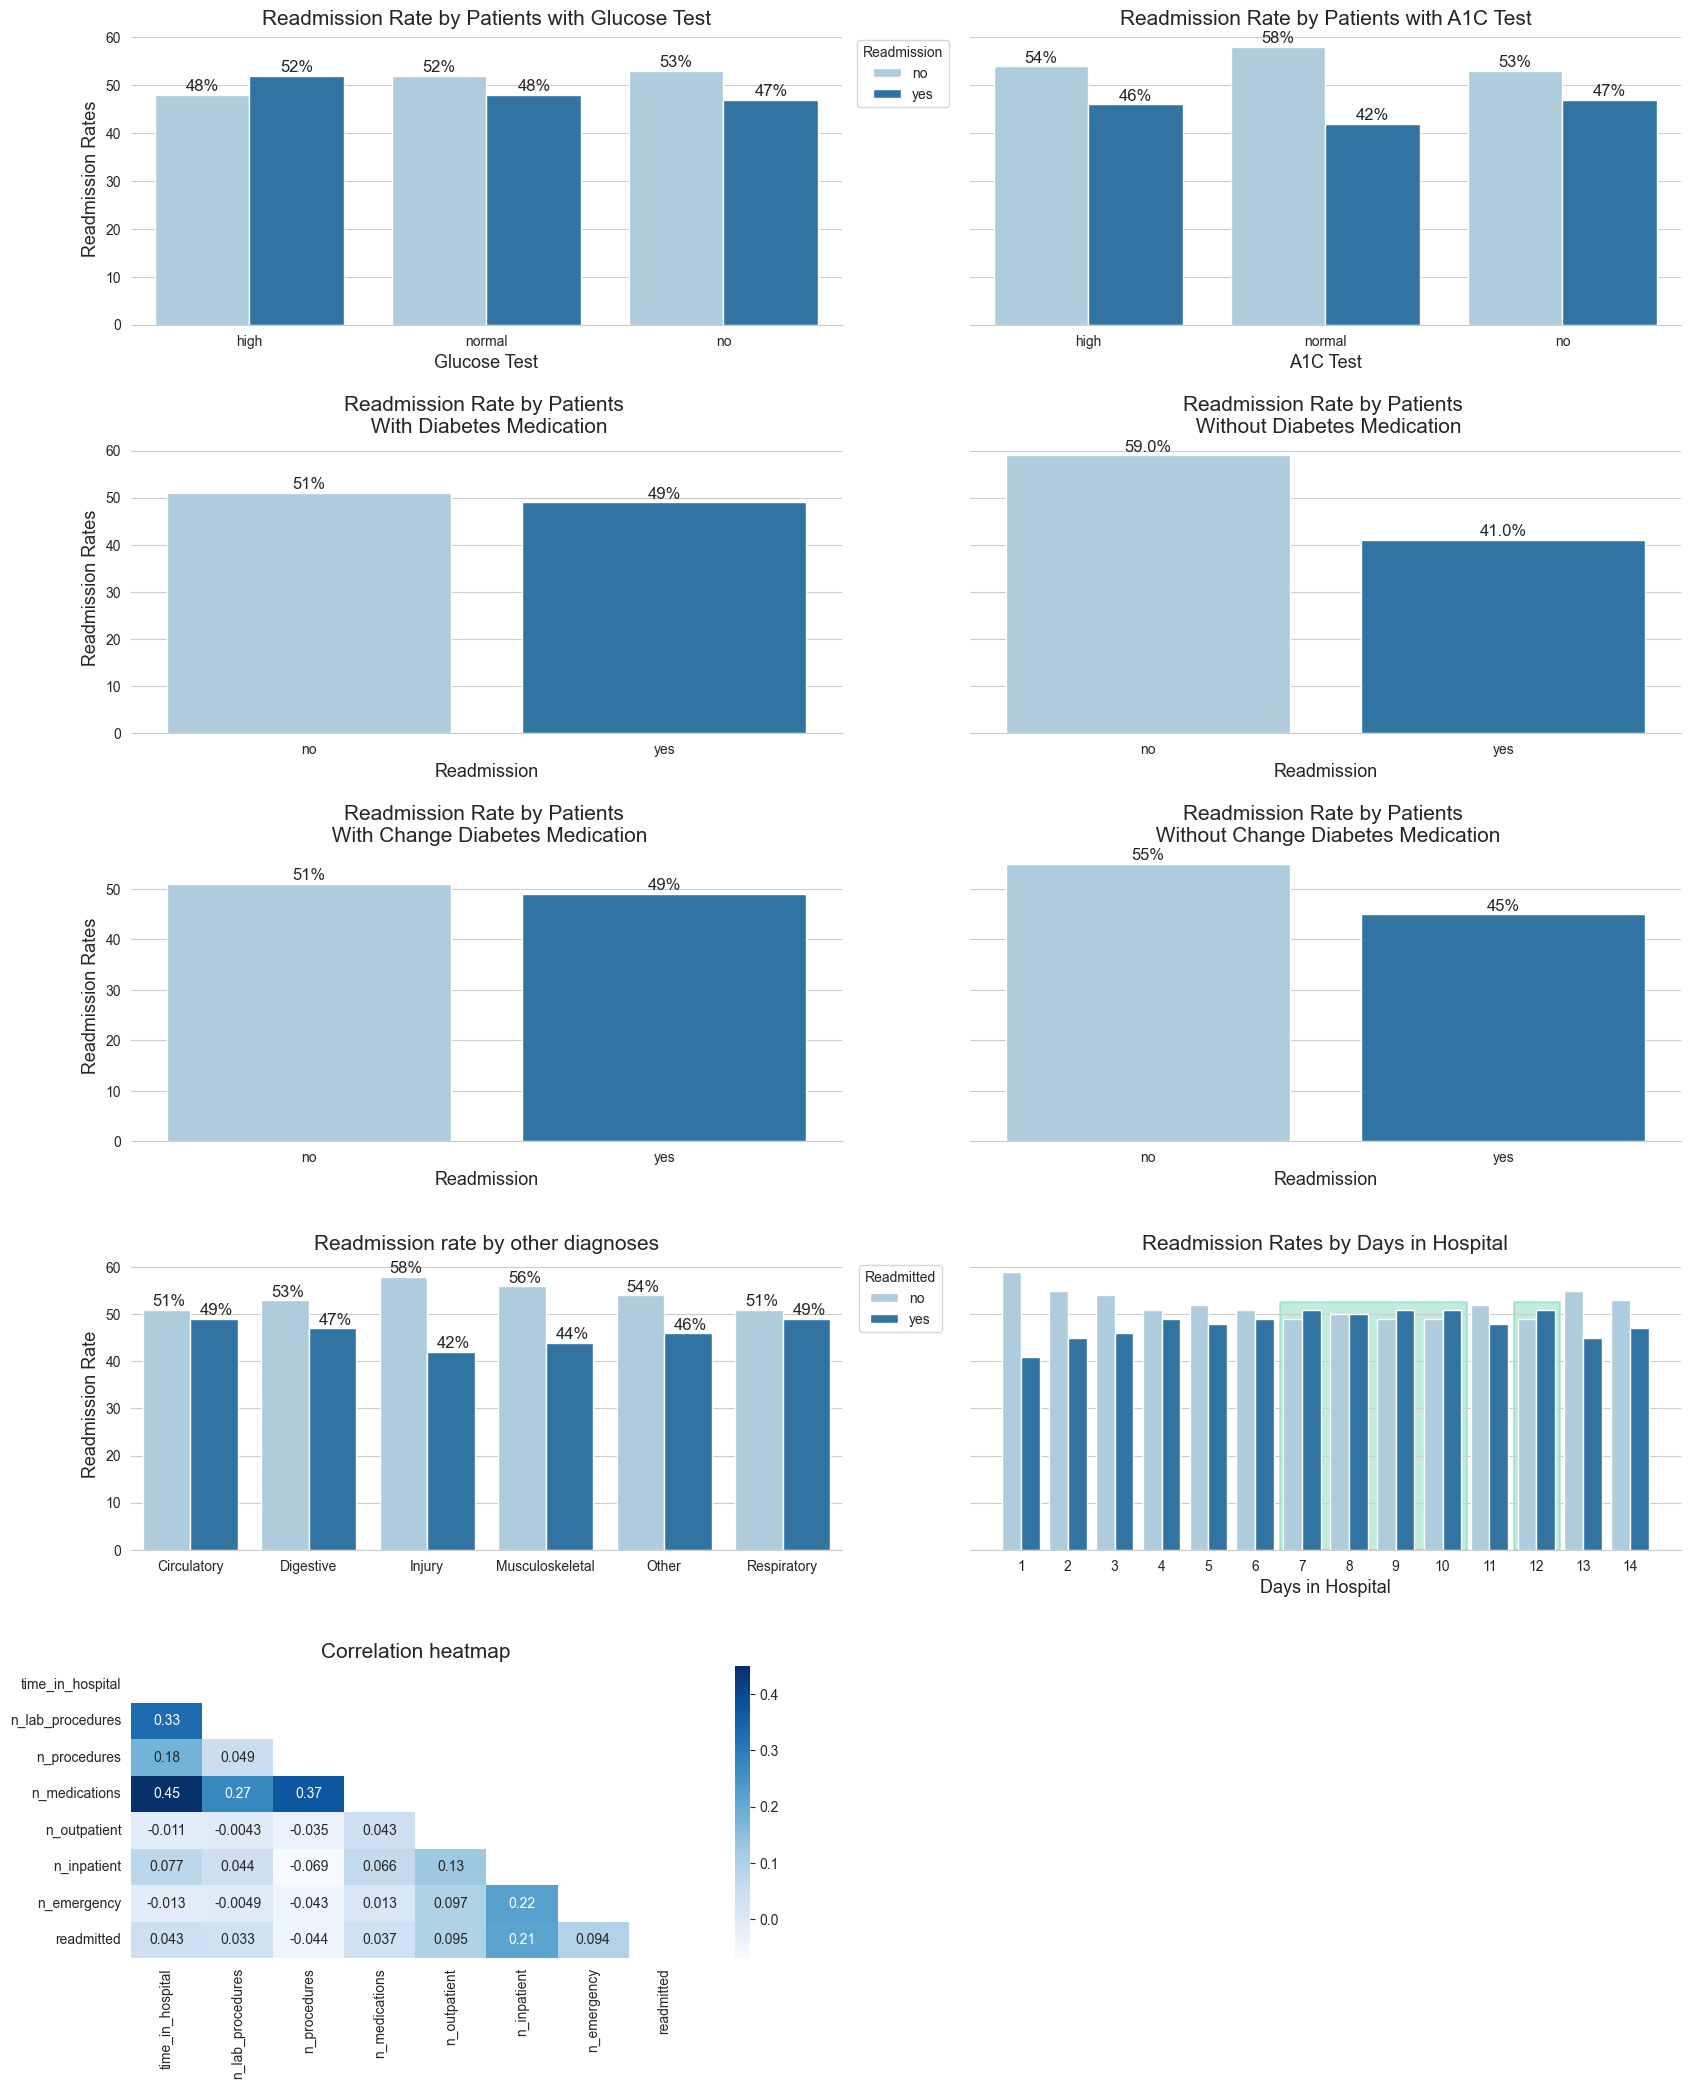

In [44]:
print('Figure 11: Subplot for futher considerations.')
sns.set_style('whitegrid')
fig , axes = plt.subplots(5,2, sharey='row', figsize=(20,25))
axes[-1, -1].remove()

# Plot Readmisson vs Glucose Test
ax = sns.barplot(x='glucose_test', 
                 y='readmission_rate', 
                 hue='readmitted',
                 order=['high', 'normal', 'no'],
                 hue_order=['no', 'yes'], 
                 data=table_4, 
                 ax=axes[0,0]
                )

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 6), fontsize=12,
                     textcoords='offset points')


ax.legend(title='Readmission', loc='upper right', bbox_to_anchor=(1.16, 1))
ax.set_xlabel('Glucose Test', fontsize=13)
ax.set_ylabel('Readmission Rates', fontsize=13)
ax.set_title('Readmission Rate by Patients with Glucose Test', fontsize=15)
sns.despine(left=True)

# Plot Readmisson vs AC1 Test
ax = sns.barplot(x='A1Ctest',
                 y='readmission_rate',
                 hue='readmitted',
                 order=['high', 'normal', 'no'],
                 data=table_5,
                 ax=axes[0,1])

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 6), fontsize=12,
                     textcoords='offset points')

ax.legend().set_visible(False)
ax.set_xlabel('A1C Test', fontsize=13)
ax.set_ylabel('')
ax.set_title('Readmission Rate by Patients with A1C Test', fontsize=15)
sns.despine(left=True)

#Plot Radmission vs Medication
data_yes = table_6[table_6['diabetes_med'] == 'yes']
ax = sns.barplot(x='readmitted', y='readmission_rate', data=data_yes, ax=axes[1, 0])
ax.set_title('Readmission Rate by Patients \n With Diabetes Medication', fontsize=15)
ax.set_xlabel('Readmission', fontsize=13)
ax.set_ylabel('Readmission Rates', fontsize=13)


for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 6), fontsize=12,
                     textcoords='offset points')


sns.despine(left=True)

#Plot Readmission vs No Medication
data_no = table_6[table_6['diabetes_med'] == 'no']
ax = sns.barplot(x='readmitted', y='readmission_rate', data=data_no, ax=axes[1, 1])
ax.set_title('Readmission Rate by Patients \n Without Diabetes Medication', fontsize=15)
ax.set_xlabel('Readmission', fontsize=13)
ax.set_ylabel('')


for bar in ax.patches:
    ax.annotate(f'{bar.get_height()}%',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 6), fontsize=12,
                     textcoords='offset points')
    
# Plot Readmission vs Change Medication
data_yes = table_7[table_7['change'] == 'yes']
ax = sns.barplot(x='readmitted', y='readmission_rate', data=data_yes, ax=axes[2, 0])
ax.set_title('Readmission Rate by Patients \n With Change Diabetes Medication', fontsize=15)
ax.set_xlabel('Readmission', fontsize=13)
ax.set_ylabel('Readmission Rates', fontsize=13)

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 6), fontsize=12,
                     textcoords='offset points')


sns.despine(left=True)

# Plot Readmission vs No Change Medication
data_no = table_7[table_7['change'] == 'no']
ax = sns.barplot(x='readmitted', y='readmission_rate', data=data_no, ax=axes[2, 1])
ax.set_title('Readmission Rate by Patients \n Without Change Diabetes Medication', fontsize=15)
ax.set_xlabel('Readmission', fontsize=13)
ax.set_ylabel('')

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center',
                     xytext=(0, 6), fontsize=12,
                     textcoords='offset points')

sns.despine(left=True)

#Plot readmission rate by other diagnosis
ax = sns.barplot(x='diseases', 
                 y='readmission_rate', 
                 hue='readmitted',
                data=other_readmission,
                ax=axes[3,0])

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center',
                     xytext=(2, 6), fontsize=12,
                     textcoords='offset points')

ax.set_title('Readmission rate by other diagnoses', fontsize=15)
ax.set_ylabel('Readmission Rate', fontsize=13)
ax.set_xlabel('')
ax.legend(title='Readmitted', loc='upper right', bbox_to_anchor=(1.15, 1))
sns.despine(left=True)


#Polt Readmission vs Time in hospital
ax = sns.barplot(x='time_in_hospital', 
                 y='readmission_rate', 
                 hue='readmitted', 
                 data=table_8, 
                 ax=axes[3,1]
                )
ax.axvspan(xmin=5.53, 
           xmax=9.53, 
           ymax=0.85, 
           facecolor='mediumaquamarine', 
           edgecolor='mediumaquamarine', 
           alpha=0.4, 
           lw=1.5, 
           zorder=-1
          )
ax.axvspan(xmin=10.53, 
           xmax=11.50, 
           ymax=0.85, 
           facecolor='mediumaquamarine', 
           edgecolor='mediumaquamarine', 
           alpha=0.4, 
           lw=1.5, 
           zorder=-1
          )

ax.set_ylabel('')
ax.set_xlabel('Days in Hospital', fontsize=13)
ax.set_title('Readmission Rates by Days in Hospital', fontsize=15)
ax.legend().set_visible(False)
sns.despine(left=True)

#correlation heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask, ax=axes[4,0])

plt.subplots_adjust(hspace=0.4, wspace=0.18)
plt.title('Correlation heatmap', fontsize=15)
plt.show()

The subplot 'Readmission Rate by Patients with Glucose Test' shows that:
- **Only patients with a high glucose level show a positive readmission rate.**
- **Piazients with a normal or 'no' glucose test level show a negative readmission rate.**

The subplot 'Readmission Rate by Patients with A1C Test' shows that:
- **All patients for A1C Test show a negative readmission rate.**


The subplot 'Readmission Rate by Patients with Diabetes Medication' shows that:
- **Patients taking diabetes medications show negative readmission rate by only one percentage point.**

The subplot 'Readmission Rate by Patients without Diabetes Medication' shows that:
- **Patients not taking diabetes medication show negative readmission rate.**


The subplot 'Readmission Rate by Patients with Change Diabetes Medication' shows that:
- **Patients with a change in the diabetes medications show negative readmission rate by only one percentage point.**

The subplot 'Readmission Rate by Patients without Change Diabetes Medication' shows that:
- **Patients without a change in the diabetes medications show negative readmission rate.**

The subplot 'Readmission rate by other diagnoses’ shows that:
- **All all patients diagnosed with other diagnoses have a negative readmission rate.**

The subplot 'Readmission Rates by Days in Hospital' shows that:
- **Patients that spent 7, 8, 9, 10, and 12  days in hospital show a positive readmission rate as highlighted by the green squares**

The subplot 'Correlation heatmap' shows that:
- **There is a moderate positive correlation between the number of medications and time spent in the hospital.**
- **There is a low positive correlation between the number of lab procedures and time spent in the hospital.**
- **There is a low positive correlation between the number of procedures  and  time spent in the hospital.**
- **There is a low positive correlation between the number of lab procedures and the number of medication.**
- **There is a low positive correlation between the number of inpatient and the number of emergency.**
- **There is a low positive correlation between the number of inpatient and readmission.**
- **There is a low positive correlation between the number of outpatient and the number of inpatient.**
- **There is a low negative correlation between the number of procedures and the number of inpatient.**

**Note:** These are only representations of the extrapolated data, no relationship between variables has been demonstrated. Therefore, an in-depth analysis is recommended to confirm further findings.

## 6. Conclusion and Recommendations
The report's findings lead us to the conclusion that several patient categories require closer attention to track their readmission rates. According to the statistics, older patients and those with particular illnesses are more likely to require readmission. The hospital should prioritize follow-up procedures for patients 60 to 95 years old, as well as those with diabetes, circulatory, and respiratory diseases, to reduce the higher risk of readmission. Additionally, patients with diabetes are more likely to be readmitted than those with other main illnesses. Furthermore, based on the machine learning models established during the analysis, particular features, such as the number of outpatient visits in the year before a hospital stay,the number of inpatient visits in the year before a hospital stay
the number of medications administered during the hospital stay, have a significant impact on the readmission rate. Overall, the report's findings suggest the necessity for the hospital to implement a more targeted plan for reducing the readmission rate. The hospital can improve patient outcomes and reduce healthcare expenses by focusing on specific patient demographics and developing plans to manage the factors that influence readmission rates. It is suggested that the hospital put the report's recommendations into action and continuously monitor its readmission rates to make sure it is accomplishing its goals.

**Recommendations**
1. Additional research could be conducted on patient groups identified as having a high likelihood of readmission to determine the specific factors influencing their readmission rates. 
2. To reduce readmission rates, the hospital may consider implementing targeted intervention programs for patients in the identified age group who have diabetic, circulatory, and respiratory diseases. 
3. Expand the "Other" diagnosis for people aged 40 to 50 to better understand the underlying causes and potential implications for patient care. 
4. Perform a cost-benefit analysis to determine the impact of follow-up efforts on patient outcomes and healthcare costs. 
5. Look into the relationship between readmission rates and other demographic factors like gender, race, and socioeconomic status.
6. Investigate the causes of readmission in diabetic patients to identify opportunities for targeted interventions to improve patient outcomes. 
7. Assess the performance of various machine learning models and identify opportunities for model improvement, such as the addition of new features or the use of more sophisticated algorithms. 
8. Examine the impact of various hospital policies and practices on readmission rates, such as discharge planning and post-discharge follow-up. 
9. Conduct a long-term study to track patient outcomes and assess the effectiveness of interventions to reduce readmission rates.

## 7. Annex

### 7.1 Tables

In [45]:
print('Table 4: Basic Statistics')
df.describe()

Table 4: Basic Statistics


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,readmitted
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,0.470160
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,0.499119
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,1.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000,1.000000


In [46]:
print('Table 5: Readmission Rate by diag_1 = Diabetes')
table_1

Table 5: Readmission Rate by diag_1 = Diabetes


,readmitted,readmission_rate
0,yes,54.0
1,no,46.0


In [47]:
print('Table 6: Readmission Rate by diag_2 = Diabetes')
table_2

Table 6: Readmission Rate by diag_2 = Diabetes


,readmitted,readmission_rate
0,no,56.0
1,yes,44.0


In [48]:
print('Table 7:Readmission Rate by diag_3 = Diabetes')
table_3

Table 7:Readmission Rate by diag_3 = Diabetes


,readmitted,readmission_rate
0,no,54.0
1,yes,46.0


In [49]:
print('Table 8: Readmission rate for each of the other diagnoses.')
other_readmission

Table 8: Readmission rate for each of the other diagnoses.


,diseases,readmitted,readmission_rate
0,Circulatory,no,51.0
1,Circulatory,yes,49.0
2,Digestive,no,53.0
3,Digestive,yes,47.0
4,Injury,no,58.0
5,Injury,yes,42.0
8,Musculoskeletal,no,56.0
9,Musculoskeletal,yes,44.0
10,Other,no,54.0
11,Other,yes,46.0


In [50]:
print('Table 9: Readmission Rate by other diseases')
toal_other_readmission

Table 9: Readmission Rate by other diseases


,readmitted,readmission_rate
0,no,53.833333
1,yes,46.166667


In [51]:
print('Table 10: Mean Readmission Rate by each Diabetes Diagnosies')
diabetes_diag

Table 10: Mean Readmission Rate by each Diabetes Diagnosies


,readmitted,readmission_rate
0,no,52.0
1,yes,48.0


In [52]:
print('Table 11: Mean Readmission Rate by Age Group')
hp_by_age

Table 11: Mean Readmission Rate by Age Group


,age,readmission_rate
0,[40-50),45.0
1,[50-60),44.0
2,[60-70),47.0
3,[70-80),49.0
4,[80-90),50.0
5,[90-100),42.0


In [53]:
print('Table 12: Mean Readmission Rate by Diagnosis')
hp_by_diag

Table 12: Mean Readmission Rate by Diagnosis


,diag_1,readmission_rate
0,Circulatory,48.0
1,Diabetes,54.0
2,Digestive,47.0
3,Injury,44.0
4,Musculoskeletal,40.0
5,Other,45.0
6,Respiratory,49.0


In [54]:
print('Table 13: Table Readmission by Glucose Test')
table_4

Table 13: Table Readmission by Glucose Test


,glucose_test,readmitted,readmission_rate
0,high,yes,52.0
1,high,no,48.0
2,no,no,53.0
3,no,yes,47.0
4,normal,no,52.0
5,normal,yes,48.0


In [55]:
print('Table 14: Table Readmission by AC1 Test')
table_5

Table 14: Table Readmission by AC1 Test


,A1Ctest,readmitted,readmission_rate
0,high,no,54.0
1,high,yes,46.0
2,no,no,53.0
3,no,yes,47.0
4,normal,no,58.0
5,normal,yes,42.0


In [56]:
print('Table 15: Table Readmission by Diabetes Medication')
table_6

Table 15: Table Readmission by Diabetes Medication


,diabetes_med,readmitted,readmission_rate
0,no,no,59.0
1,no,yes,41.0
2,yes,no,51.0
3,yes,yes,49.0


In [57]:
print('Table 16: Table Readmission by Cahnge Medication')
table_7

Table 16: Table Readmission by Cahnge Medication


,change,readmitted,readmission_rate
0,no,no,55.0
1,no,yes,45.0
2,yes,no,51.0
3,yes,yes,49.0


In [58]:
print('Table 17: Table Readmission by Time in Hospital Medication')
table_8

Table 17: Table Readmission by Time in Hospital Medication


,time_in_hospital,readmitted,readmission_rate
0,1,no,59.0
1,1,yes,41.0
2,2,no,55.0
3,2,yes,45.0
4,3,no,54.0
5,3,yes,46.0
6,4,no,51.0
7,4,yes,49.0
8,5,no,52.0
9,5,yes,48.0


### 7.2 Other info and visualizations

In [59]:
df['readmitted'] = df.readmitted.map({0 : 'no', 1 : 'yes'})

In [60]:
num = df.select_dtypes(exclude= ['object'])

Figure 12: Subplot dataframe density distribution.


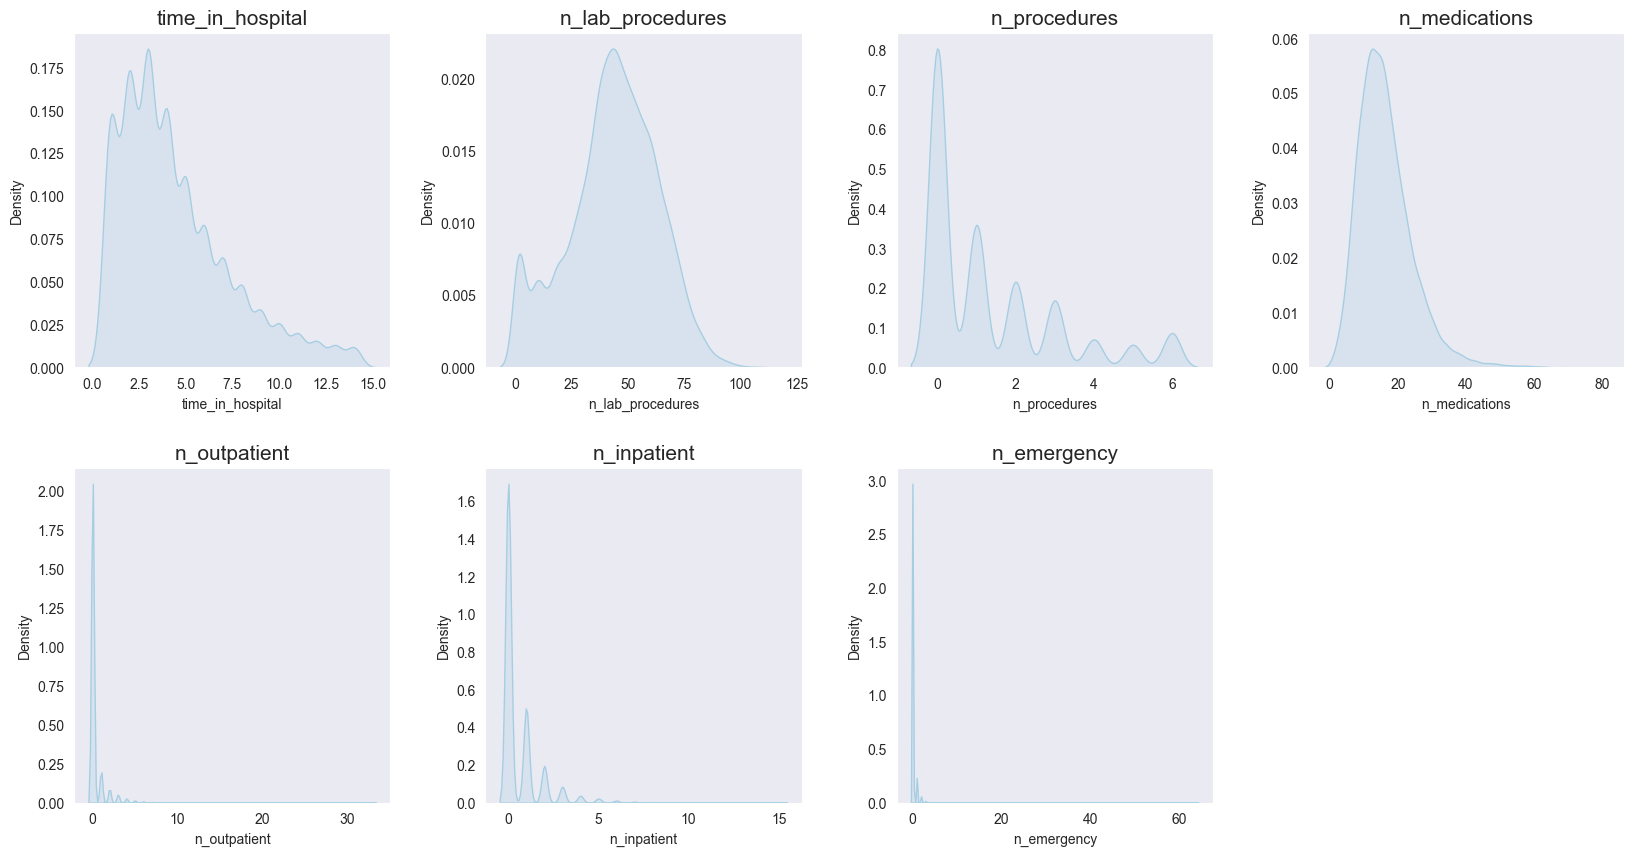

In [61]:
print('Figure 12: Subplot dataframe density distribution.')
sns.set_style('dark')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[-1, -1].remove()
sns.set_palette('Blues_r')

# Iterate over the axes and the columns to fill the subplots with boxplots
for ax, col in zip(axes.flatten(), num.columns):
    sns.kdeplot(num[col], ax=ax, fill=True)
    ax.set_title(col, fontsize=15)

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()


Figure 13. Subplot distribution and outliers.


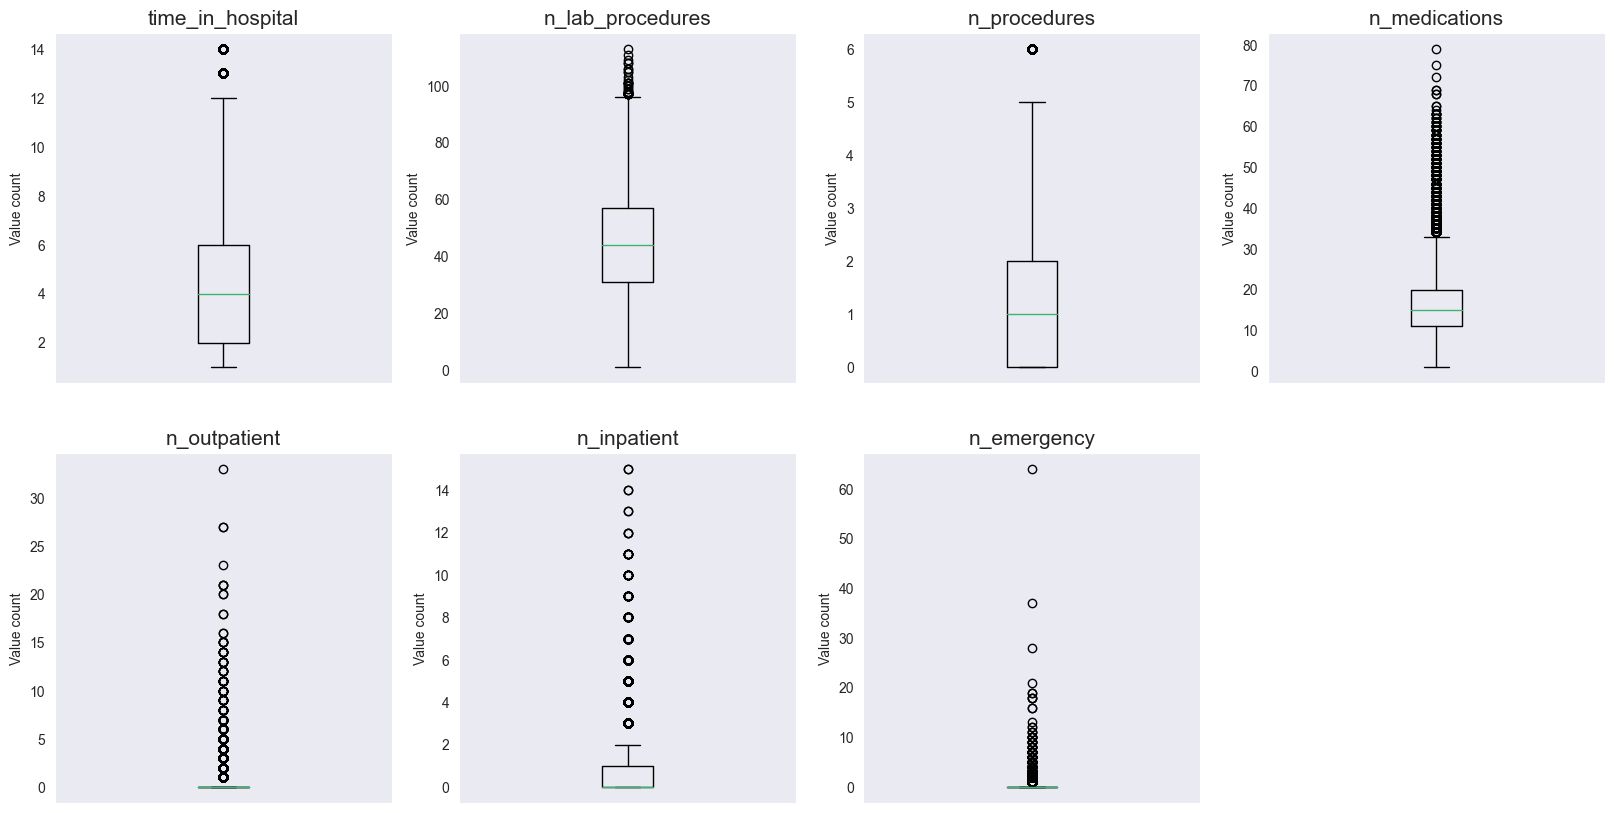


The total number of outliers is: 11181

Number of outliers in each columns:
time_in_hospital     580
n_lab_procedures      33
n_procedures        1227
n_medications        844
n_outpatient        4141
n_inpatient         1628
n_emergency         2728
dtype: int64


In [62]:
print('Figure 13. Subplot distribution and outliers.')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[-1, -1].remove()
sns.set_palette('bright')

# Iterate over the axes and the columns to fill the subplots with boxplots
for ax, col in zip(axes.flatten(), num.columns):
    ax.boxplot(num[col], medianprops={'color': 'mediumseagreen'})
    ax.set_title(col, fontsize=15)
    ax.set_ylabel('Value count')
    ax.set_xticks([])
    

plt.subplots_adjust(hspace=0.2, wspace=0.2)

plt.show()
print(f"\nThe total number of outliers is: {outliers.count().sum()}\n\nNumber of outliers in each columns:\n{outliers.count()}") 

### 7.3 Code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

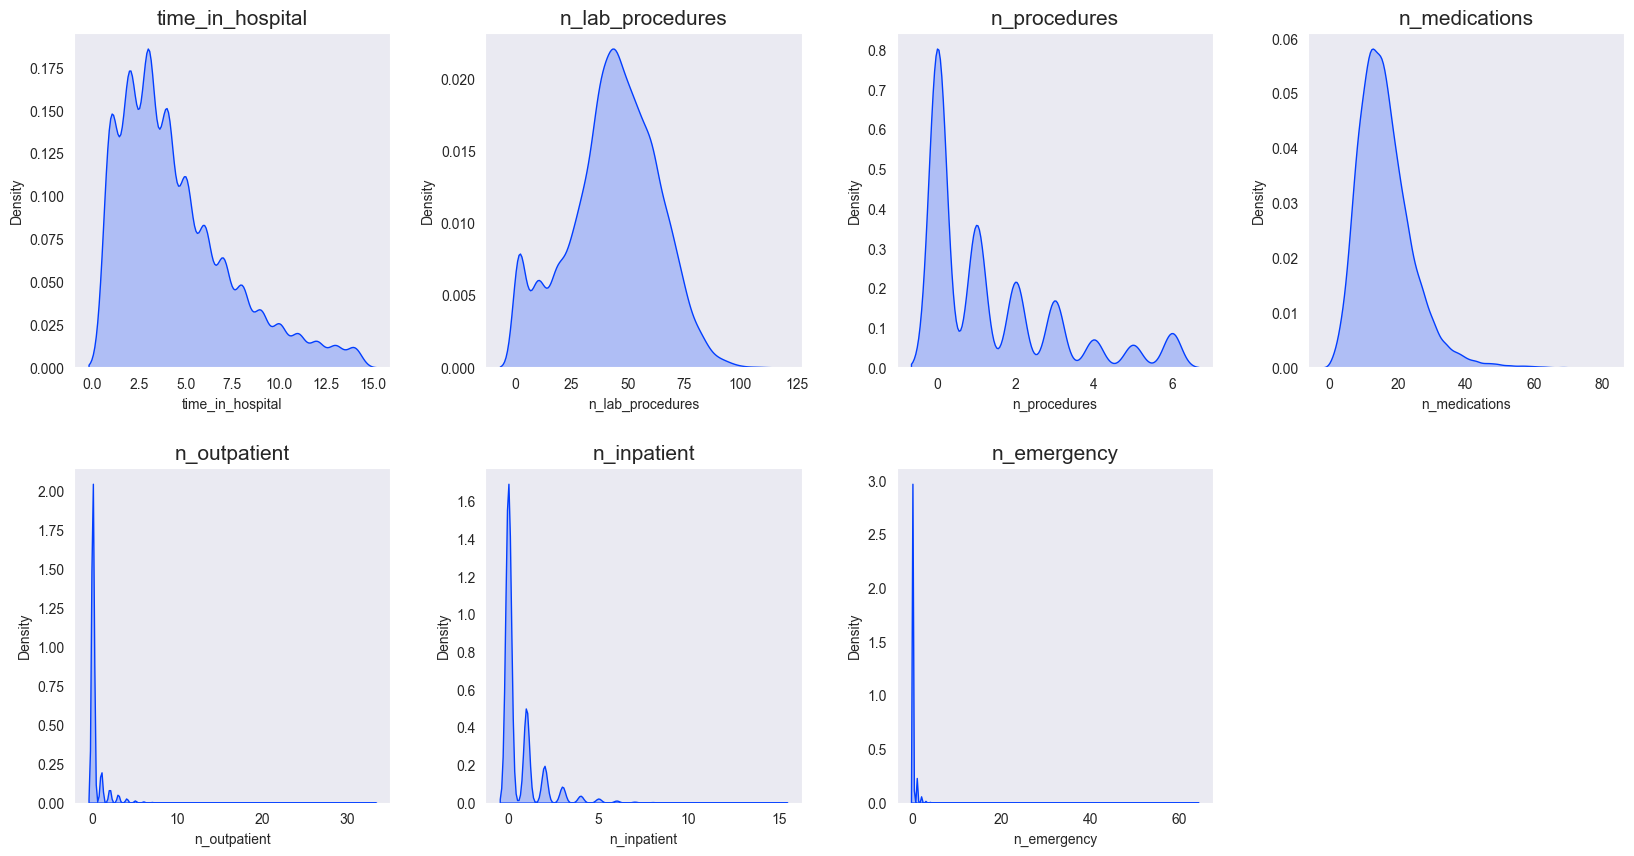

Figure 13. Subplot distribution and outliers.


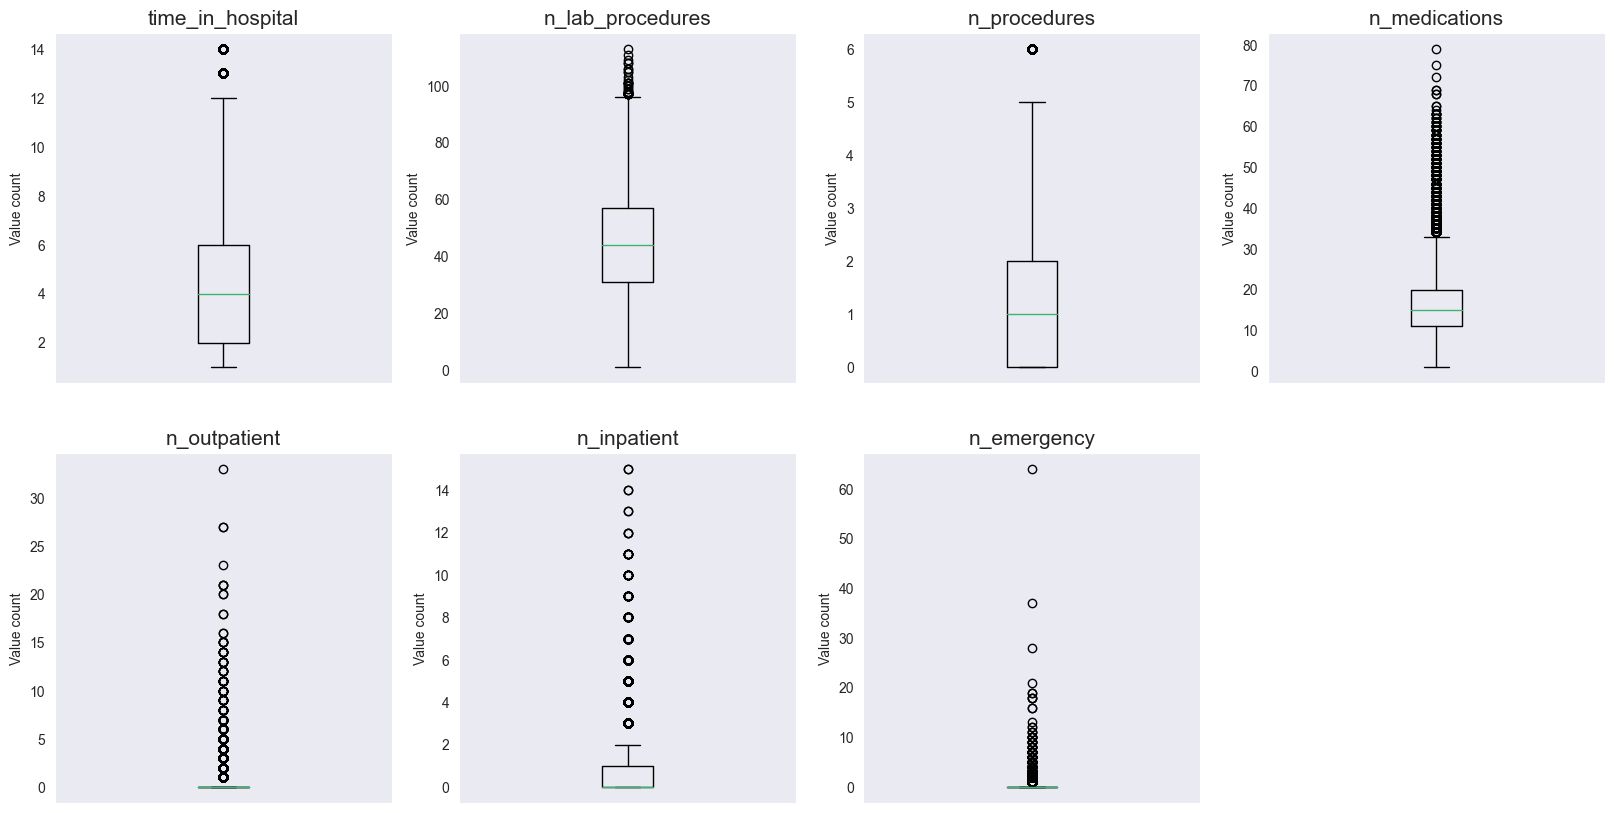

The total number of outliers is: 11181

Number of outliers in each columns:
time_in_hospital     580
n_lab_procedures      33
n_procedures        1227
n_medications        844
n_outpatient        4141
n_inpatient         1628
n_emergency         2728
dtype: int64


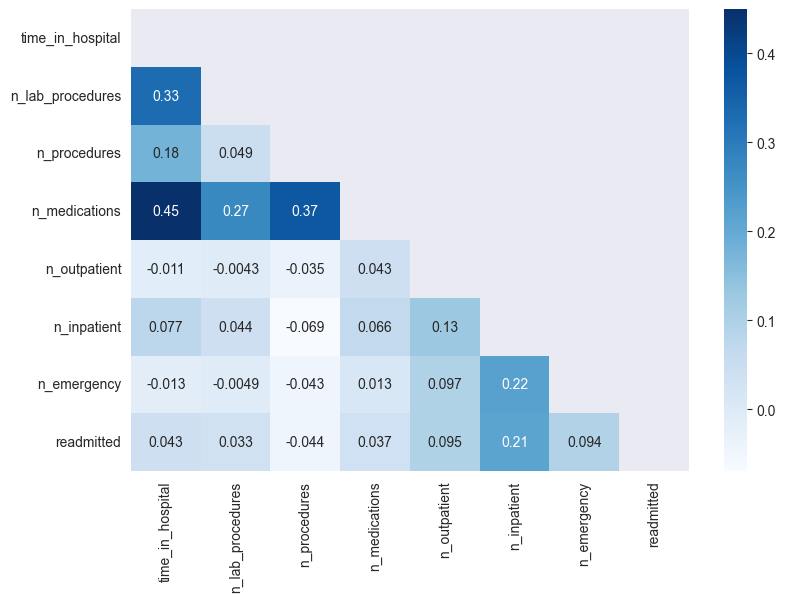

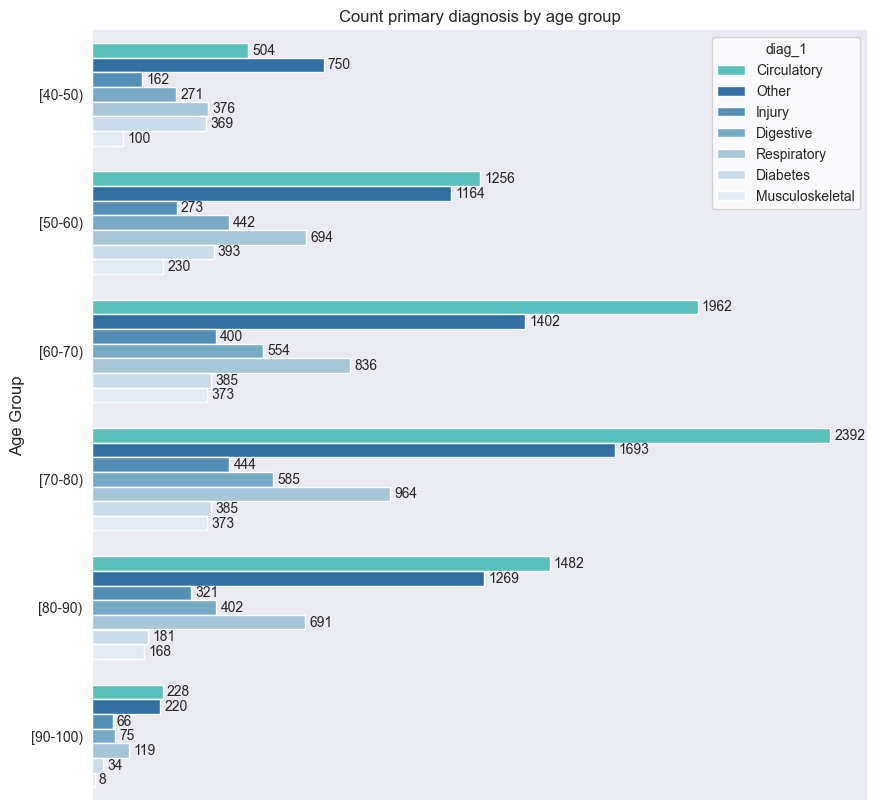

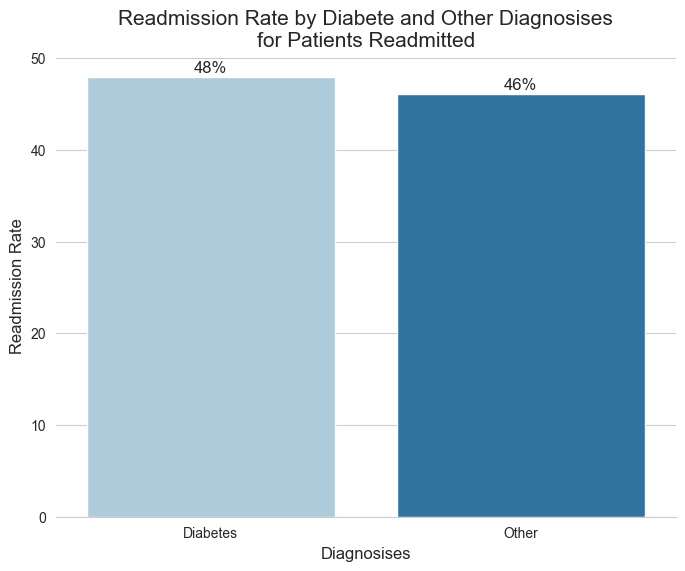

    ---------------------------------------    Results Chi-squared test    ---------------------------------------

The p_value is: 9.417255851416736e-09 
Is p_value less than alpha?: True


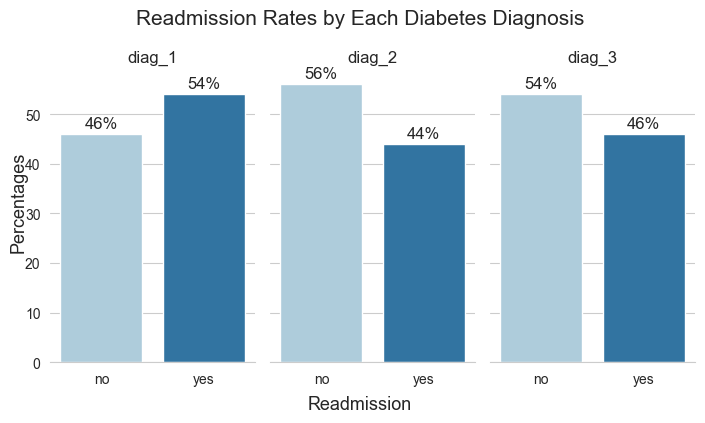

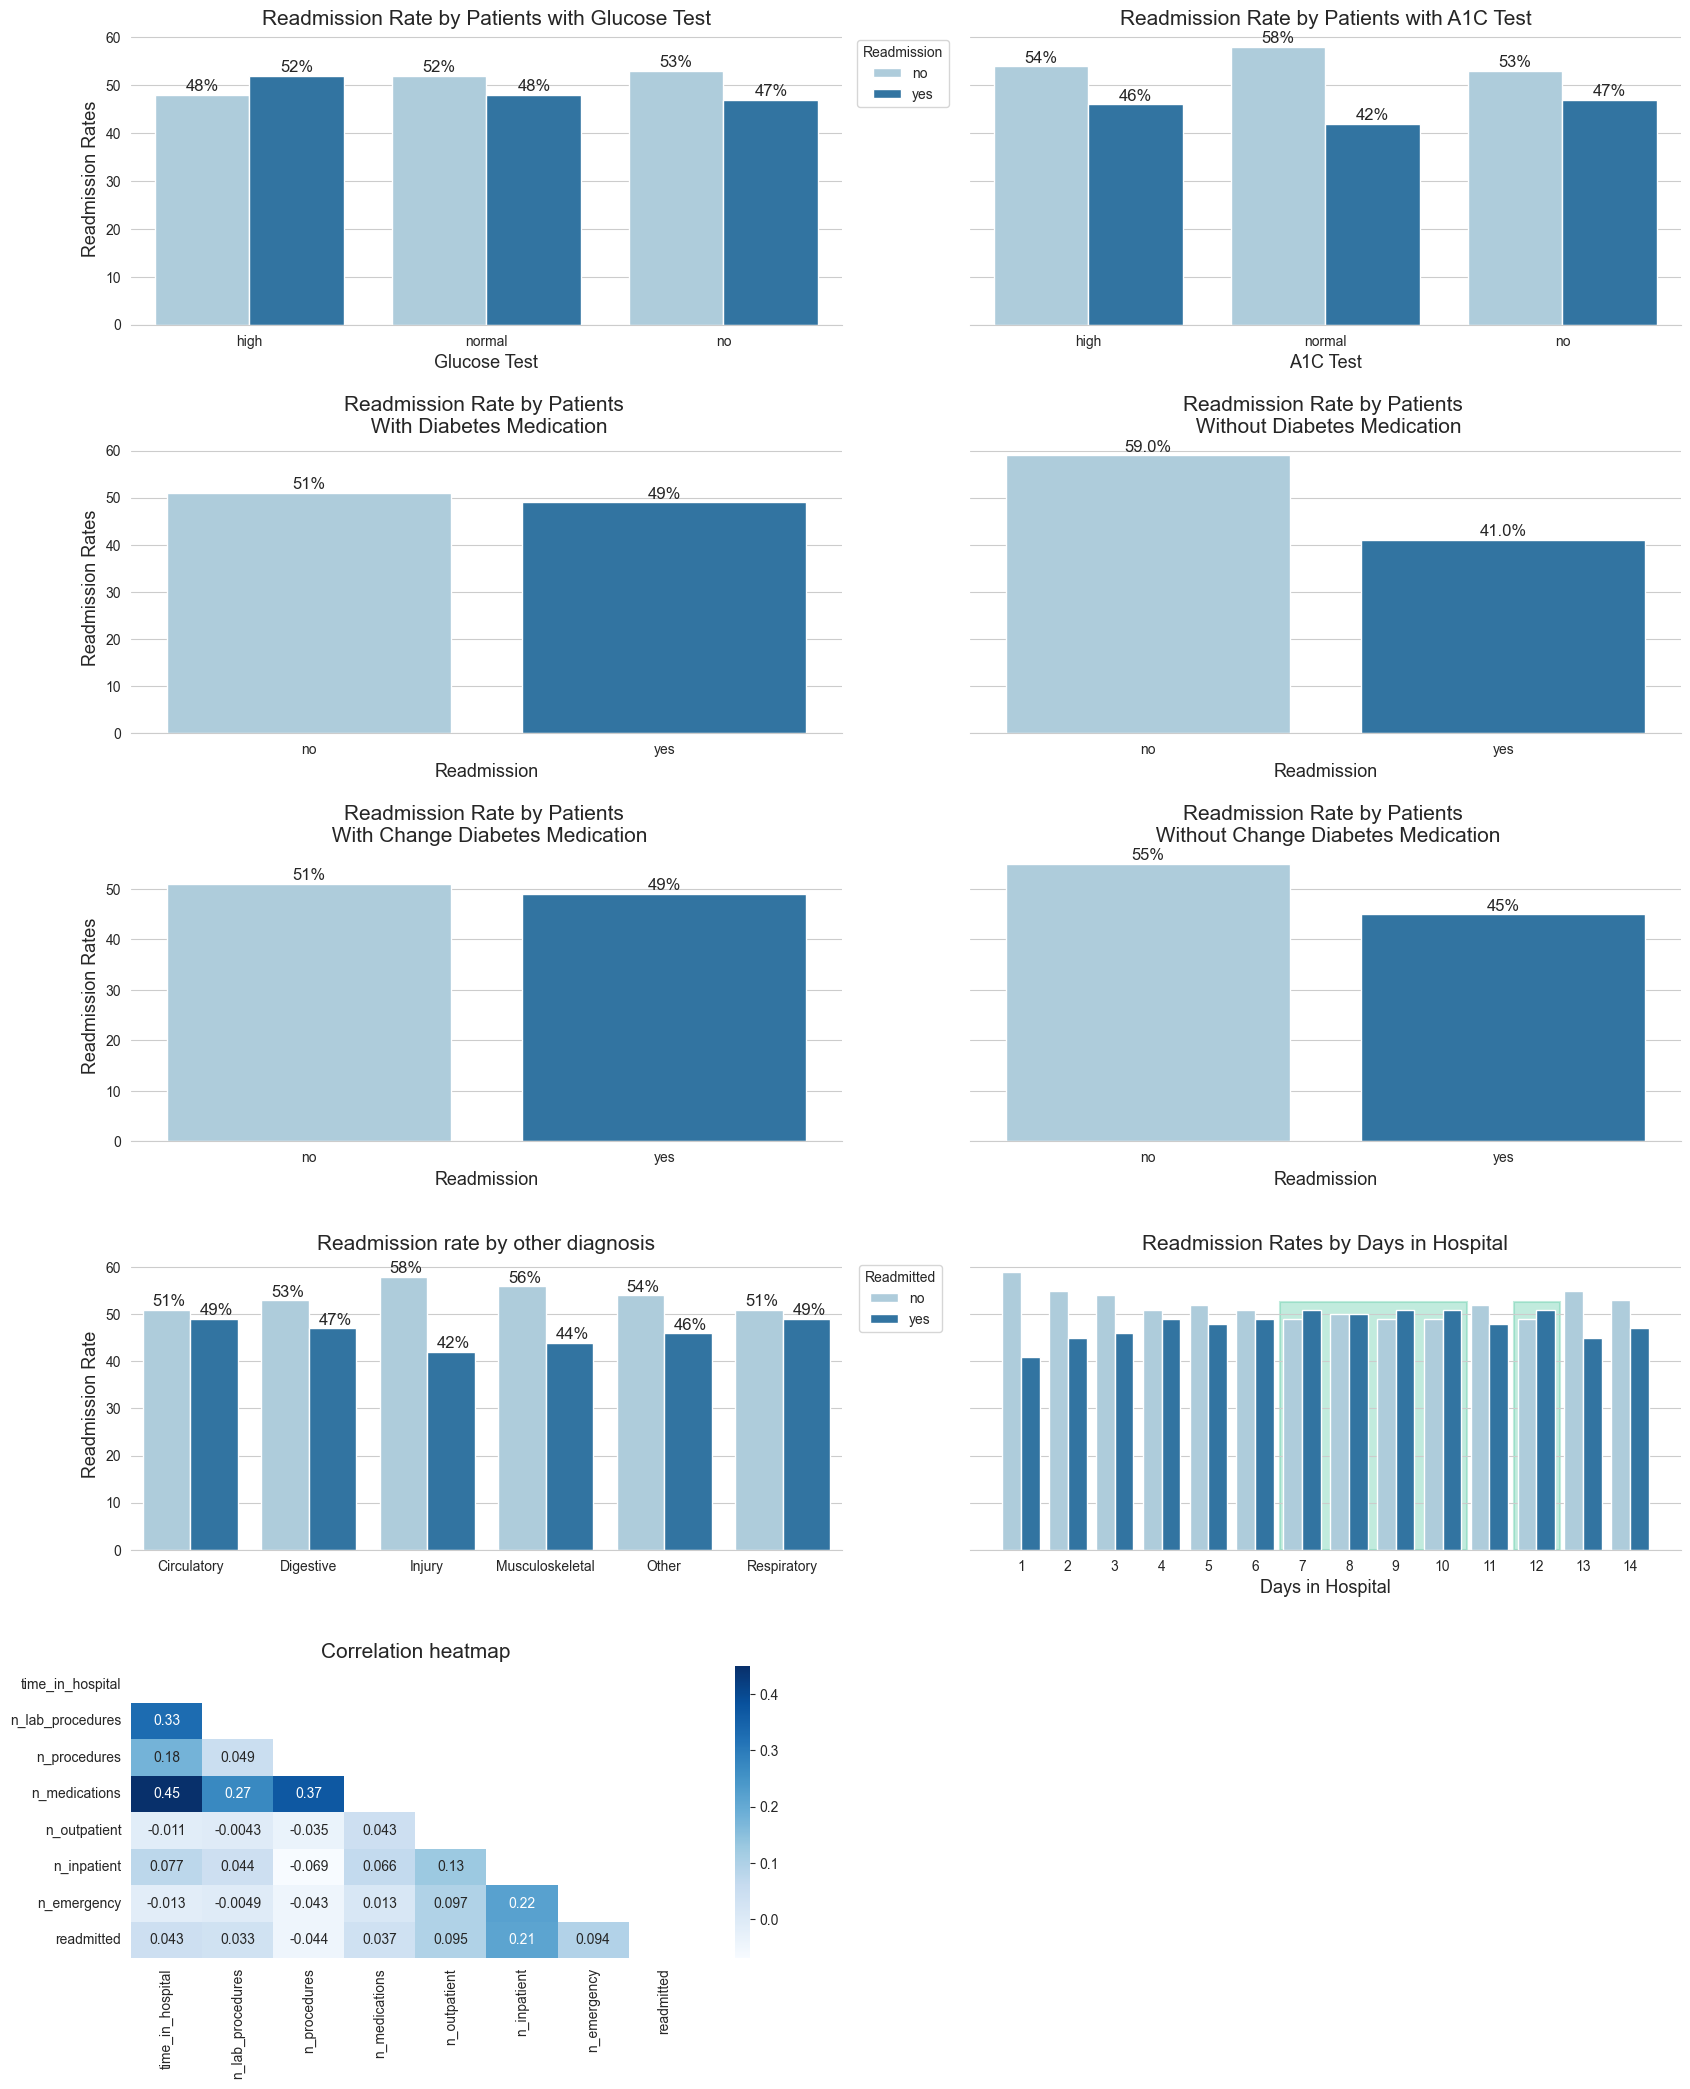

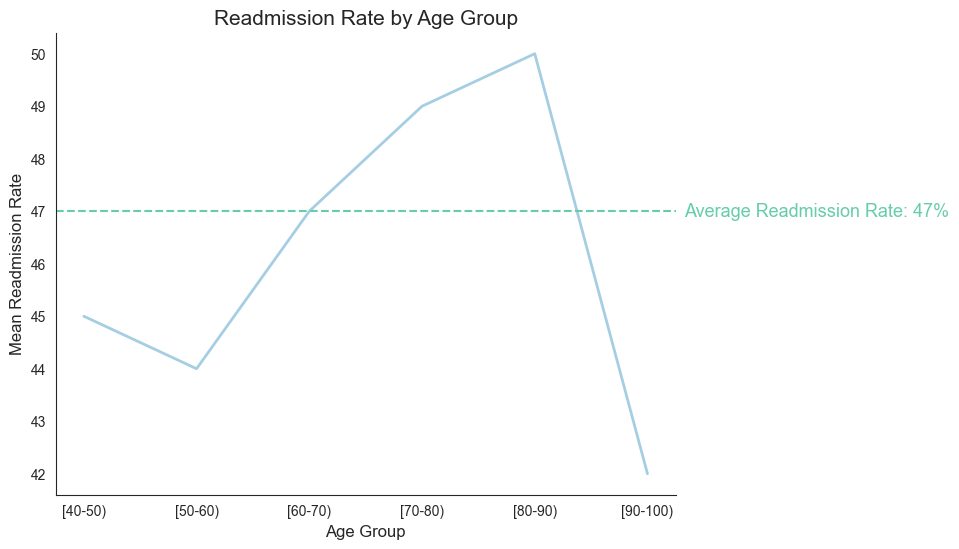

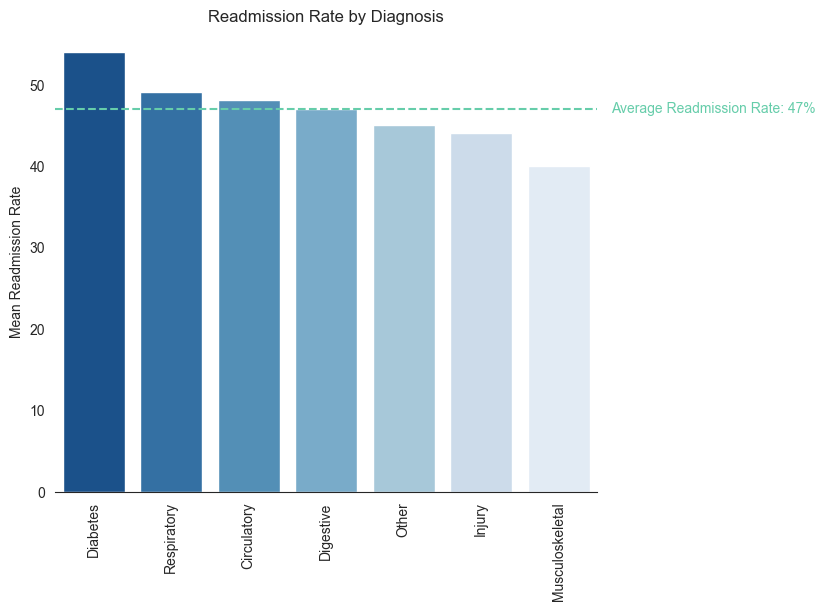

Table 2: Base models metrics table.
Figure 5: Cross-Validation performance for K-Neighbors Classifier, Logistic Regression, Random Forest Classifier.


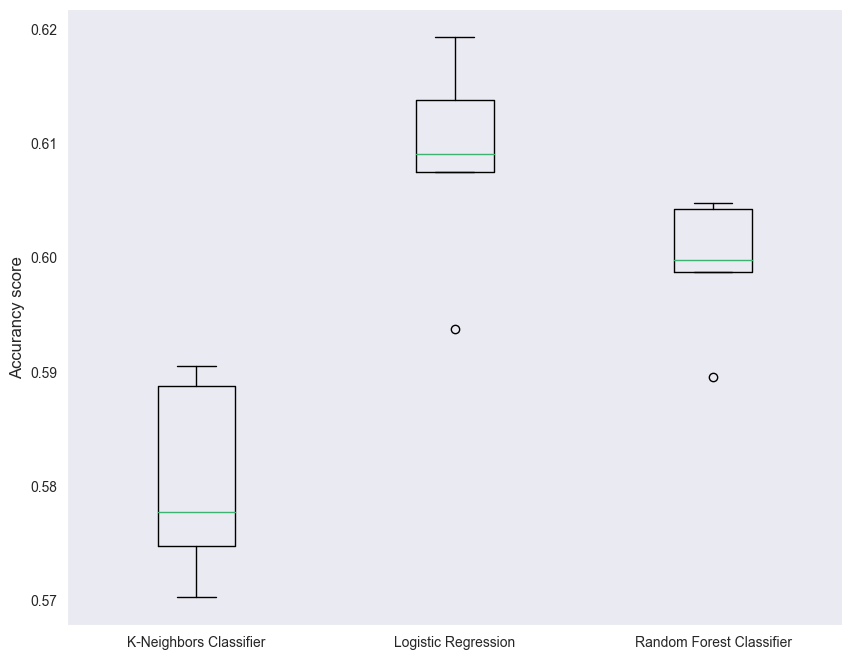


------------------------------------------------------------------
K-Neighbors Classifier Test Set Accuracy: 0.5874
Logistic Regression Test Set Accuracy: 0.6164
Random Forest Classifier Test Set Accuracy: 0.607
Figure 6: Test set area under the ROC curve and PR curve
The best estimator is: Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  ['time_in_hospital',
                                                   'n_lab_procedures',
                                                   'n_procedures',
                                                   'n_medications',
                                                   'n_outpatient',
                                                   'n_inpatient',
                                                   'n_emergency']),
                                                 ('One 

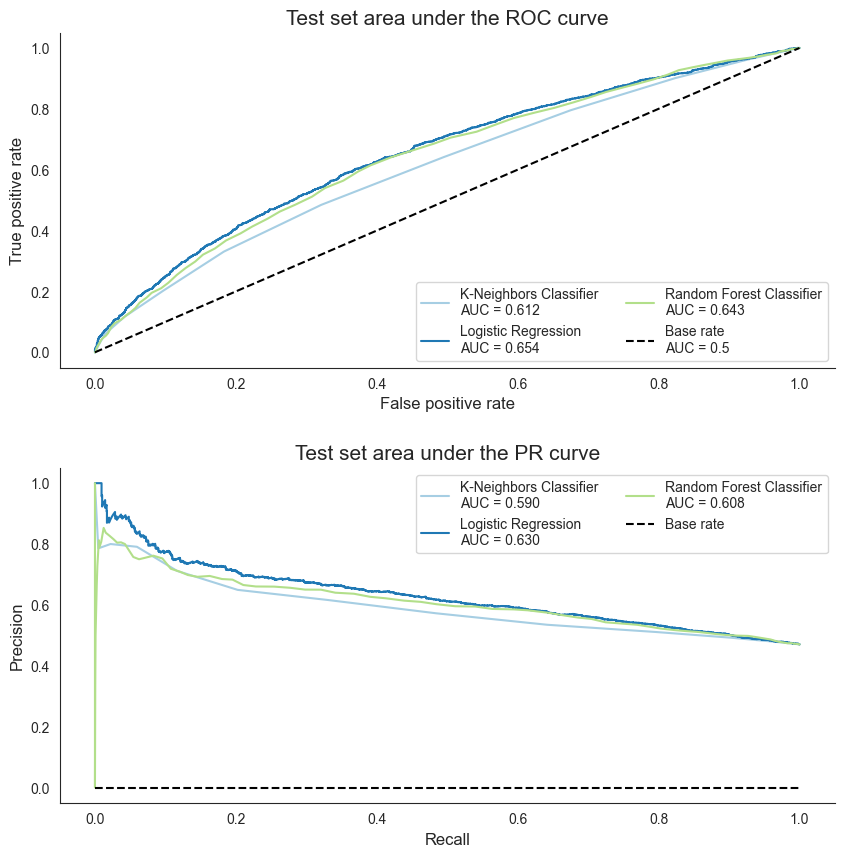

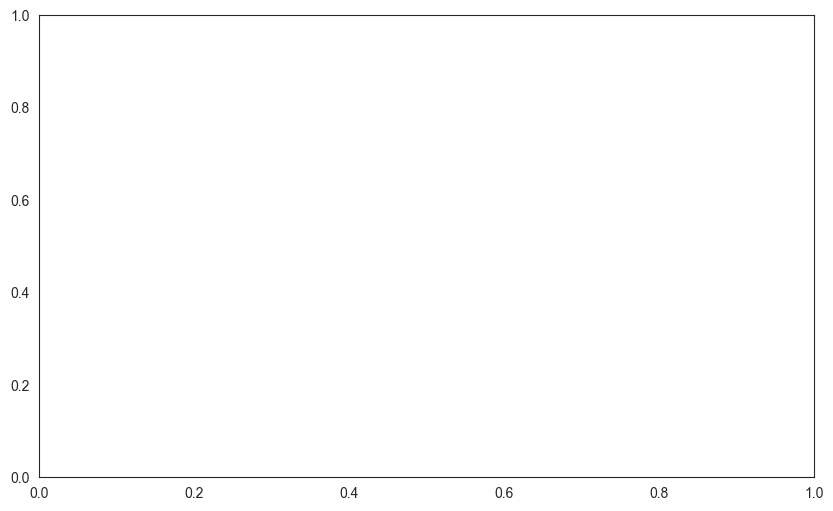

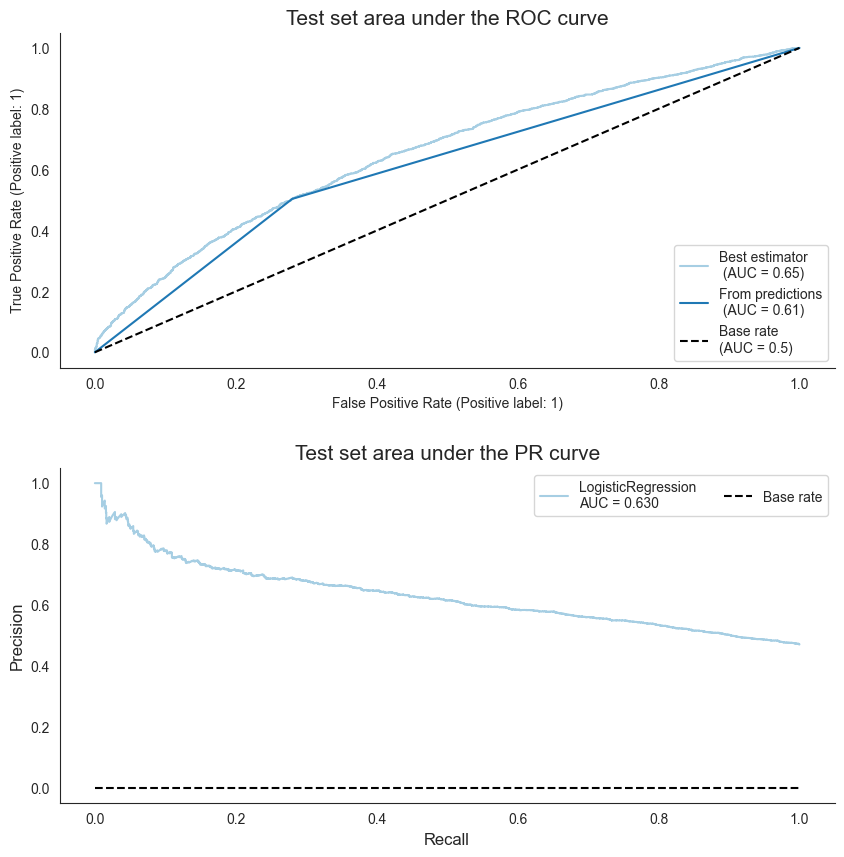

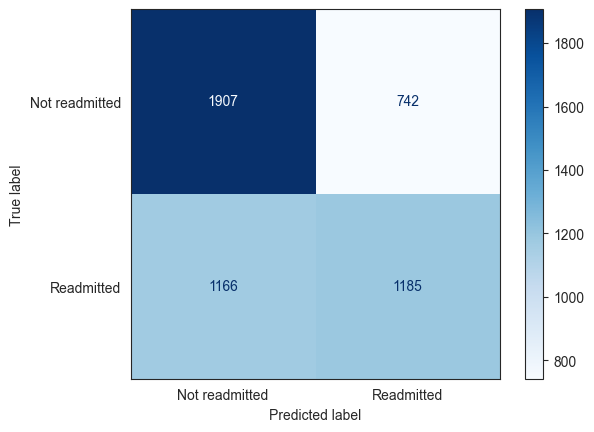

Figure 9: GridSearchCV best estimator (Logistic Regression) coefficient impotances.


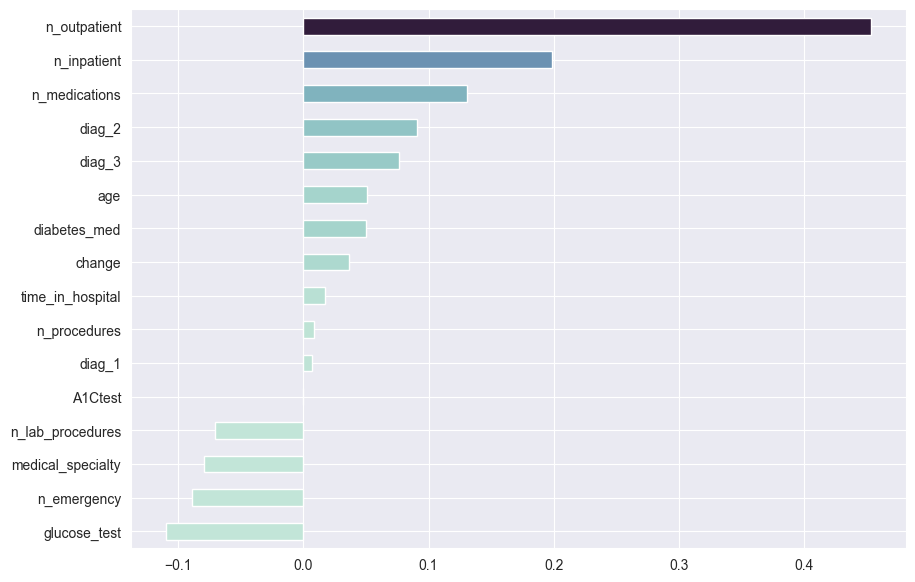

In [63]:
# Baisc Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import time
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, auc, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

############### Data Manipulation and Data Cleaning ###############

# Load df
df = pd.read_csv('data/hospital_readmissions.csv')

df.info()
df.isna().sum()
df.duplicated().sum()

# Check for cat variables and and special characters
for column, values in df.iteritems():
    unique_values = values.sort_values().unique()
    print(f"Unique values in column '{column}': {unique_values}")

num = df.select_dtypes(exclude=['object'])

# Plot data distribution
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[-1, -1].remove()
sns.set_style('dark')
sns.set_palette('Blues_r')

for ax, col in zip(axes.flatten(), num.columns):
    sns.kdeplot(num[col], ax=ax, fill=True)
    ax.set_title(col, fontsize=15)

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.show()

# Basic statistic
df.describe()

# Plot Basic statistic and outliers
print('Figure 13. Subplot distribution and outliers.')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[-1, -1].remove()
sns.set_palette('bright')

# Iterate over the axes and the columns to fill the subplots with boxplots
for ax, col in zip(axes.flatten(), num.columns):
    ax.boxplot(num[col], medianprops={'color': 'mediumseagreen'})
    ax.set_title(col, fontsize=15)
    ax.set_ylabel('Value count')
    ax.set_xticks([])

plt.subplots_adjust(hspace=0.2, wspace=0.2)

plt.show()

# Inspecting outliers
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = num[(num < lower_bound) | (num > upper_bound)]

print(
    f"The total number of outliers is: {outliers.count().sum()}\n\nNumber of outliers in each columns:\n{outliers.count()}")

# Feature correlation
df['readmitted'] = df.readmitted.map({'yes': 1, 'no': 0})
corr = df.corr()

# Plot correlation
fig = plt.figure(figsize=(9, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask)

plt.show()

# Ranking table diagnosis by age group
age_group = df.groupby(['age', 'diag_1']).size().reset_index(name='counts')

pivot_table = pd.pivot_table(age_group,
                             index='diag_1',
                             columns='age',
                             values='counts').drop('Missing', axis=0).rank(ascending=False, axis=0)


def color_rank_one(val):
    '''This function applies the orange background color to the first rank'''
    if val == 1:
        return 'background-color: mediumturquoise'
    else:
        return ''


pivot_table.style.format('{:,.0f}').background_gradient(cmap='Blues_r', axis=0).applymap(color_rank_one)

# Plot diagnosis by age group
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style('white')

diagnosis = df[df['diag_1'] != 'Missing']
unique_diags = diagnosis.diag_1.unique()

blues = sns.color_palette('Blues', n_colors=len(unique_diags))
custom_palette = ["mediumturquoise" if diag == "Circulatory"
                  else blues[len(unique_diags) - 1 - i]
                  for i, diag in enumerate(unique_diags)]

sns.countplot(y='age',
              hue='diag_1',
              order=diagnosis.age.sort_values().unique(),
              palette=custom_palette,
              data=diagnosis
              )

for bar in ax.patches:
    width = bar.get_width()
    x = width
    y = bar.get_y() + bar.get_height() / 2
    label = f"{width:.0f}"
    ax.annotate(label, (x, y),
                ha='left', va='center',
                xytext=(3, 0), fontsize=10,
                textcoords='offset points'
                )

sns.despine(bottom=True)
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('')
plt.xticks([])
plt.title('Count primary diagnosis by age group')

plt.show()

# Maps the values in the 'readmitted' column
df['readmitted'] = df.readmitted.map({1: 'yes', 0: 'no'})

# Filtering diag_1 equal diabetes
df_diag_1 = df[df['diag_1'] == 'Diabetes']

# Table readmission rate by diag_1 equal diabetes
table_1 = (df_diag_1['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
           .rename(columns={'index': 'readmitted'})
           )

table_1

# Filtering diag_2 equal diabetes
df_diag_2 = df[df['diag_2'] == 'Diabetes']

# Table readmission rate by diag_2 equal diabetes
table_2 = (df_diag_2['readmitted']
           .value_counts(normalize=True)
           .mul(100).round()
           .reset_index(name='readmission_rate')
           .rename(columns={'index': 'readmitted'})
           )

table_2

# Filtering diag_1 equal diabetes
df_diag_3 = df[df['diag_3'] == 'Diabetes']

# Table readmission rate by diag_3 equal diabetes
table_3 = (df_diag_3['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
           .rename(columns={'index': 'readmitted'})
           )

table_3

# Filtering df different by 'Diabetes'
other_diag = df[df.apply(lambda x: 'Diabetes' not in x.values, axis=1)]

# Df other diagnosis
other_diag = (other_diag[['readmitted', 'diag_1', 'diag_2', 'diag_3']]
              .melt(id_vars='readmitted', var_name='diag', value_name='diseases')
              .drop('diag', axis=1)
              )

# Table readmission rate for each of the other diagnoses.
other_readmission = (other_diag.
                     groupby('diseases')
                     .value_counts(normalize=True)
                     .mul(100)
                     .round()
                     .reset_index(name='readmission_rate')
                     )

other_readmission = other_readmission[other_readmission['diseases'] != 'Missing']

# Table readmission by other diagnosis
toal_other_readmission = (other_readmission
                          .groupby('readmitted')['readmission_rate']
                          .mean()
                          .reset_index(name='readmission_rate')
                          )

toal_other_readmission

# Concat  table_1, table_2, table_3
diabetes_diag = pd.concat([table_1, table_2, table_3])

# Table diabetes_diag
diabetes_diag = pd.DataFrame(diabetes_diag
                             .groupby('readmitted')['readmission_rate']
                             .mean()
                             .reset_index()
                             )

# Table diabetes_other_diag
diabetes_other_diag = pd.concat([diabetes_diag, toal_other_readmission])

# Filtering fro readmitted = yes
diabetes_other_diag = diabetes_other_diag[diabetes_other_diag['readmitted'] == 'yes']

# Create a new column
diabetes_other_diag['diagnosis'] = ['Diabetes', 'Other']

# Sorting columns
diabetes_other_diag = diabetes_other_diag.reindex(columns=['diagnosis', 'readmitted', 'readmission_rate'])

diabetes_other_diag

# Plot Readmission Rate by Diabete and Other Diagnosises
sns.set_style('whitegrid')
sns.set_palette('Paired')
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='diagnosis', y='readmission_rate', data=diabetes_other_diag)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f"{height:.0f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1), textcoords='offset points',
                ha='center', va='bottom', fontsize=12)

sns.despine(left=True)
plt.title('Readmission Rate by Diabete and Other Diagnosises\nfor Patients Readmitted', fontsize=15)
plt.xlabel('Diagnosises', fontsize=12)
plt.ylabel('Readmission Rate', fontsize=12)
plt.show()

############### Chi-squared test ###############
# Set the p-value threshold to 0.05
alpha = 0.05

# Create a new column 'has_diabetes' indicating whether the primary diagnosis is diabetes
df['has_diabetes'] = df.diag_1.str.contains('Diabetes')

# Perform a chi-squared independence test between 'has_diabetes' and 'readmitted' and obtain the p-value
expected, observed, stats = pg.chi2_independence(data=df, y='has_diabetes', x='readmitted', correction=False)

df.drop('has_diabetes', axis=1, inplace=True)

# Print results
print(
    '    ---------------------------------------    Results Chi-squared test    ---------------------------------------\n')
print(f'The p_value is: {stats.pval.max()} \nIs p_value less than alpha?: {stats.pval.max() < alpha}')

##Other table
# table Readmission vs glucose test
table_4 = (df
           .groupby('glucose_test')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
           )

table_4

# Table readmission vs AC1 test
table_5 = (df
           .groupby('A1Ctest')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
           )

table_5

# Table Readmission vs diabetes medication
table_6 = (df
           .groupby('diabetes_med')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
           )

table_6

# Table readmission vs change medication
table_7 = (df
           .groupby('change')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
           )

table_7

# Table readmission vs time in hospital
table_8 = (df
           .groupby('time_in_hospital')['readmitted']
           .value_counts(normalize=True)
           .mul(100)
           .round()
           .reset_index(name='readmission_rate')
           )

table_8

# Plot Readmission Rates by Each Diabetes Diagnosis
sns.set_style('whitegrid')
sns.set_palette('Paired')

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(7, 4))

for i, table in enumerate([table_1, table_2, table_3]):
    ax = axes[i]
    sns.barplot(x='readmitted', y='readmission_rate', data=table.sort_values('readmitted'), ax=ax)
    ax.set_title(f'diag_{i + 1}')
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Annotate bar plot with percentage values
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{height:.0f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2), textcoords='offset points',
                    ha='center', va='bottom', fontsize=12)

fig.suptitle("Readmission Rates by Each Diabetes Diagnosis", fontsize=15)
fig.text(0.5, -0.02, 'Readmission', ha='center', fontsize=13)
fig.text(0, 0.5, 'Percentages', va='center', fontsize=13, rotation=90)
plt.tight_layout()
sns.despine(left=True)

plt.show()

# Subplots Other Tables
sns.set_style('whitegrid')
fig, axes = plt.subplots(5, 2, sharey='row', figsize=(20, 25))
axes[-1, -1].remove()

# Plot Readmisson vs Glucose Test
ax = sns.barplot(x='glucose_test',
                 y='readmission_rate',
                 hue='readmitted',
                 order=['high', 'normal', 'no'],
                 hue_order=['no', 'yes'],
                 data=table_4,
                 ax=axes[0, 0]
                 )

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext=(0, 6), fontsize=12,
                textcoords='offset points')

ax.legend(title='Readmission', loc='upper right', bbox_to_anchor=(1.16, 1))
ax.set_xlabel('Glucose Test', fontsize=13)
ax.set_ylabel('Readmission Rates', fontsize=13)
ax.set_title('Readmission Rate by Patients with Glucose Test', fontsize=15)
sns.despine(left=True)

# Plot Readmisson vs AC1 Test
ax = sns.barplot(x='A1Ctest',
                 y='readmission_rate',
                 hue='readmitted',
                 order=['high', 'normal', 'no'],
                 data=table_5,
                 ax=axes[0, 1])

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext=(0, 6), fontsize=12,
                textcoords='offset points')

ax.legend().set_visible(False)
ax.set_xlabel('A1C Test', fontsize=13)
ax.set_ylabel('')
ax.set_title('Readmission Rate by Patients with A1C Test', fontsize=15)
sns.despine(left=True)

# Plot Radmission vs Medication
data_yes = table_6[table_6['diabetes_med'] == 'yes']
ax = sns.barplot(x='readmitted', y='readmission_rate', data=data_yes, ax=axes[1, 0])
ax.set_title('Readmission Rate by Patients \n With Diabetes Medication', fontsize=15)
ax.set_xlabel('Readmission', fontsize=13)
ax.set_ylabel('Readmission Rates', fontsize=13)

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext=(0, 6), fontsize=12,
                textcoords='offset points')

sns.despine(left=True)

# Plot Readmission vs No Medication
data_no = table_6[table_6['diabetes_med'] == 'no']
ax = sns.barplot(x='readmitted', y='readmission_rate', data=data_no, ax=axes[1, 1])
ax.set_title('Readmission Rate by Patients \n Without Diabetes Medication', fontsize=15)
ax.set_xlabel('Readmission', fontsize=13)
ax.set_ylabel('')

for bar in ax.patches:
    ax.annotate(f'{bar.get_height()}%',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext=(0, 6), fontsize=12,
                textcoords='offset points')

# Plot Readmission vs Change Medication
data_yes = table_7[table_7['change'] == 'yes']
ax = sns.barplot(x='readmitted', y='readmission_rate', data=data_yes, ax=axes[2, 0])
ax.set_title('Readmission Rate by Patients \n With Change Diabetes Medication', fontsize=15)
ax.set_xlabel('Readmission', fontsize=13)
ax.set_ylabel('Readmission Rates', fontsize=13)

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext=(0, 6), fontsize=12,
                textcoords='offset points')

sns.despine(left=True)

# Plot Readmission vs No Change Medication
data_no = table_7[table_7['change'] == 'no']
ax = sns.barplot(x='readmitted', y='readmission_rate', data=data_no, ax=axes[2, 1])
ax.set_title('Readmission Rate by Patients \n Without Change Diabetes Medication', fontsize=15)
ax.set_xlabel('Readmission', fontsize=13)
ax.set_ylabel('')

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext=(0, 6), fontsize=12,
                textcoords='offset points')

sns.despine(left=True)

# Plot readmission rate by other diagnosis
ax = sns.barplot(x='diseases',
                 y='readmission_rate',
                 hue='readmitted',
                 data=other_readmission,
                 ax=axes[3, 0])

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}%',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center',
                xytext=(2, 6), fontsize=12,
                textcoords='offset points')

ax.set_title('Readmission rate by other diagnosis', fontsize=15)
ax.set_ylabel('Readmission Rate', fontsize=13)
ax.set_xlabel('')
ax.legend(title='Readmitted', loc='upper right', bbox_to_anchor=(1.15, 1))
sns.despine(left=True)

# Polt Readmission vs Time in hospital
ax = sns.barplot(x='time_in_hospital',
                 y='readmission_rate',
                 hue='readmitted',
                 data=table_8,
                 ax=axes[3, 1]
                 )
ax.axvspan(xmin=5.53,
           xmax=9.53,
           ymax=0.85,
           facecolor='mediumaquamarine',
           edgecolor='mediumaquamarine',
           alpha=0.4,
           lw=1.5,
           zorder=-1
           )
ax.axvspan(xmin=10.53,
           xmax=11.50,
           ymax=0.85,
           facecolor='mediumaquamarine',
           edgecolor='mediumaquamarine',
           alpha=0.4,
           lw=1.5,
           zorder=-1
           )

ax.set_ylabel('')
ax.set_xlabel('Days in Hospital', fontsize=13)
ax.set_title('Readmission Rates by Days in Hospital', fontsize=15)
ax.legend().set_visible(False)
sns.despine(left=True)

# correlation heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask, ax=axes[4, 0])

plt.subplots_adjust(hspace=0.4, wspace=0.18)
plt.title('Correlation heatmap', fontsize=15)

plt.show()

# Maps the values in the 'readmitted' column
df['readmitted'] = df['readmitted'].map({'yes': 1, 'no': 0})

# Find the readmission_rate mean
tot_mean = round((df.readmitted.mean() * 100))

# Table readmission rate by age group
hp_by_age = (df.groupby('age')['readmitted']
             .mean()
             .mul(100)
             .round()
             .reset_index(name='readmission_rate')
             )

hp_by_age

# Plot Mean readmission rate by age group
fig = plt.figure(figsize=(8, 6))
sns.set_style('white')
sns.set_palette('Paired')

sns.lineplot(x='age', y='readmission_rate', lw=2, data=hp_by_age)

plt.axhline(y=tot_mean, color='mediumaquamarine', linestyle='--', )

plt.text(6.5, tot_mean,
         f'Average Readmission Rate: {tot_mean}%',
         ha='center', va='center',
         color='mediumaquamarine', fontsize=13
         )

plt.title('Readmission Rate by Age Group', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Readmission Rate', fontsize=12)
sns.despine()

plt.show()

# Table readmission rate by diagnosis
hp_by_diag = (df[df.diag_1 != "Missing"]
              .groupby('diag_1')['readmitted']
              .mean()
              .mul(100)
              .round()
              .reset_index(name='readmission_rate')
              )

hp_by_diag

# Plot readmission rate by diagnosis
fig = plt.figure(figsize=(7, 6))
sns.set_style('white')

sns.barplot(
    y='readmission_rate',
    x='diag_1',
    palette='Blues_r',
    data=hp_by_diag.sort_values('readmission_rate', ascending=False)
)

plt.axhline(y=tot_mean, color='mediumaquamarine', linestyle='--')

plt.text(
    8, tot_mean,
    f'Average Readmission Rate: {tot_mean}%',
    ha='center', va='center', color='mediumaquamarine'
)

plt.title('Readmission Rate by Diagnosis')
plt.ylabel('Mean Readmission Rate')
plt.xlabel('')
plt.xticks(rotation=90)
sns.despine(left=True)

plt.show()

############### MACHINE LEARNING ###############
###Feature engenieering and preprocessing###
seed = 217

# Mapping target variable
df['readmitted'] = df.readmitted.replace({'yes': 1, 'no': 0})

# Create feature and target set
X = df.drop('readmitted', axis=1)
y = df.readmitted

# Splitting feature and target set into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)

# Selecting categorical and numeric columns
num_selector = make_column_selector(dtype_exclude='object')
cat_selector = make_column_selector(dtype_include='object')
num_cols = num_selector(X)
cat_cols = cat_selector(X)

# Preprocessing categorical and numeric columns
num_preprocessor = StandardScaler()
cat_preprocessor = OneHotEncoder()

# Merge preprocessed categorical and numeric columns
preprocessor = ColumnTransformer([
    ('StandardScaler', num_preprocessor, num_cols),
    ('One Hot Encoder', cat_preprocessor, cat_cols)
])

# Make a pipelines dictionary
pipelines = {'K-Neighbors Classifier': make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=13)),
             'Logistic Regression': make_pipeline(preprocessor, LogisticRegression(random_state=seed)),
             'Random Forest Classifier': make_pipeline(preprocessor, RandomForestClassifier(random_state=seed))}

# Defining a function to get a table of model metrics.
# Function to get models metrics
def metrics_from_pipes(pipes_dict):
    '''
    This function takes as input a dictionary of ML pipilines  and
    returns a table all the train and test metrics for
    each model in the dictionary
    '''
    train_accs = []
    train_f1s = []
    train_roc_aucs = []
    train_pr_aucs = []
    train_precs = []
    train_recs = []
    train_specs = []
    train_fprs_list = []
    train_fnrs_list = []

    test_accs = []
    test_f1s = []
    test_roc_aucs = []
    test_pr_aucs = []
    test_precs = []
    test_recs = []
    test_specs = []
    test_fprs_list = []
    test_fnrs_list = []

    for name, pipeline in pipes_dict.items():
        pipeline.fit(X_train, y_train)
        y_pred_test = pipeline.predict(X_test)
        y_pred_train = pipeline.predict(X_train)

        y_probs_test = pipeline.predict_proba(X_test)[:, 1]
        y_probs_train = pipeline.predict_proba(X_train)[:, 1]

        train_precisions, train_recalls, threshold = precision_recall_curve(y_train, y_probs_train)
        test_precisions, test_recalls, threshold = precision_recall_curve(y_test, y_probs_test)

        tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
        tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()

        train_accs.append(accuracy_score(y_train, y_pred_train))
        train_f1s.append(f1_score(y_train, y_pred_train))
        train_roc_aucs.append(roc_auc_score(y_train, y_probs_train))
        train_pr_aucs.append(auc(train_recalls, train_precisions))
        train_precs.append(precision_score(y_train, y_pred_train))
        train_recs.append(recall_score(y_train, y_pred_train))
        train_specs.append(tn_train / (tn_train + fp_train))
        train_fprs_list.append(fp_train / (fp_train + tn_train))
        train_fnrs_list.append(fn_train / (fn_train + tp_train))

        test_accs.append(accuracy_score(y_test, y_pred_test))
        test_f1s.append(f1_score(y_test, y_pred_test))
        test_roc_aucs.append(roc_auc_score(y_test, y_probs_test))
        test_pr_aucs.append(auc(test_recalls, test_precisions))
        test_precs.append(precision_score(y_test, y_pred_test))
        test_recs.append(recall_score(y_test, y_pred_test))
        test_specs.append(tn_test / (tn_test + fp_test))
        test_fprs_list.append(fp_test / (fp_test + tn_test))
        test_fnrs_list.append(fn_test / (fn_test + tp_test))

    # aggregate the performance metric lists into seperate dataframes
    train_metrics = pd.DataFrame(
        {'model': pipes_dict.keys(),
         'accuracy': train_accs,
         'f1_score': train_f1s,
         'roc_auc': train_roc_aucs,
         'pr_auc': train_pr_aucs,
         'precision': train_precs,
         'recall': train_recs,
         'specificity': train_specs,
         'false_positive_rate': train_fprs_list,
         'false_negative_rate': train_fnrs_list})

    test_metrics = pd.DataFrame(
        {'model': pipes_dict.keys(),
         'accuracy': test_accs,
         'f1_score': test_f1s,
         'roc_auc': test_roc_aucs,
         'pr_auc': test_pr_aucs,
         'precision': test_precs,
         'recall': test_recs,
         'specificity': test_specs,
         'false_positive_rate': test_fprs_list,
         'false_negative_rate': test_fnrs_list})

    # Merging metrics from train and test set
    train_test_metrics = train_metrics.merge(test_metrics,
                                             on='model',
                                             how='left',
                                             suffixes=('_train', '_test'))

    # Sorting coulmns
    train_test_metrics = train_test_metrics.reindex(columns=['model',
                                                             'accuracy_train',
                                                             'accuracy_test',
                                                             'f1_score_train',
                                                             'f1_score_test',
                                                             'roc_auc_train',
                                                             'roc_auc_test',
                                                             'pr_auc_train',
                                                             'pr_auc_test',
                                                             'precision_train',
                                                             'precision_test',
                                                             'recall_train',
                                                             'recall_test',
                                                             'specificity_train',
                                                             'specificity_test',
                                                             'false_positive_rate_train',
                                                             'false_positive_rate_test',
                                                             'false_negative_rate_train',
                                                             'false_negative_rate_test'])

    return train_test_metrics.set_index('model').transpose()

# Getting metrics_table
metrics_table = metrics_from_pipes(pipelines)
print('Table 2: Base models metrics table.')
metrics_table.style.background_gradient(cmap='Blues')

# Evaluating multiple models
def boxplot_cv_perfomances_from_pipes(pipelines_dict):
    results = []

    for pipeline in pipelines_dict.values():
        kf = KFold(n_splits=5)
        cv_results = cross_val_score(pipeline, X_train, y_train, cv=kf)
        results.append(cv_results)

    #Plot Cross-Validation Performance
    sns.set_style('dark')
    fig = plt.figure(figsize=(10,8))
    plt.boxplot(results, labels=pipelines.keys(), medianprops={'color': 'mediumseagreen'})
    plt.ylabel('Accurancy score', fontsize=12)
    #plt.title('Cross-Validation Performance for Three Models:\n KNN, Logistic Regression, and Random Forest Classifier')

    plt.show()

    print('\n------------------------------------------------------------------')

    #test set performance
    for name, pipeline in pipelines_dict.items():
        pipeline.fit(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)
        print(f"{name} Test Set Accuracy: {test_score}")

print('Figure 5: Cross-Validation performance for K-Neighbors Classifier, Logistic Regression, Random Forest Classifier.')
boxplot_cv_perfomances_from_pipes(pipelines)

# Defining a function to plot roc_pr_auc_curve.
def roc_pr_auc_curves_from_pipes(pipes_dict):
    fprss = []
    tprss = []
    precs = []
    recs = []
    roc_aucs = []
    pr_aucs = []

    for name, pipeline in pipes_dict.items():
        y_probs = pipeline.predict_proba(X_test)[:, 1]

        fprs, tprs, _ = roc_curve(y_test, y_probs)
        precisions, recalls, _ = precision_recall_curve(y_test, y_probs)

        fprss.append(fprs)
        tprss.append(tprs)
        precs.append(precisions)
        recs.append(recalls)
        roc_aucs.append(roc_auc_score(y_test, y_probs))
        pr_aucs.append(auc(recalls, precisions))

    sns.set_style('white')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

    for i in range(len(fprss)):
        model_name = list(pipes_dict.keys())[i]
        label_model = f"{model_name}\nAUC = {roc_aucs[i]:.3f}"
        ax1.plot(fprss[i], tprss[i], label=label_model)
    ax1.plot([0, 1], [0, 1], linestyle='--', label='Base rate\nAUC = 0.5', color='black')
    ax1.set_xlabel('False positive rate', fontsize=12)
    ax1.set_ylabel('True positive rate', fontsize=12)
    ax1.set_title('Test set area under the ROC curve', fontsize=15)
    ax1.legend(loc="lower right", bbox_to_anchor=(1, 0), ncol=2, frameon=True)

    for i in range(len(precs)):
        model_name = list(pipes_dict.keys())[i]
        label_model = f"{model_name}\nAUC = {pr_aucs[i]:.3f}"
        ax2.plot(recs[i], precs[i], label=label_model)
    ax2.plot([0, 1], [0, 0], linestyle='--', label='Base rate', color='black')
    ax2.set_xlabel('Recall', fontsize=12)
    ax2.set_ylabel('Precision', fontsize=12)
    ax2.set_title('Test set area under the PR curve', fontsize=15)
    ax2.legend(loc="upper right", bbox_to_anchor=(1, 1), ncol=2, frameon=True)
    plt.subplots_adjust(hspace=0.3)
    sns.despine()

print('Figure 6: Test set area under the ROC curve and PR curve')
roc_pr_auc_curves_from_pipes(pipelines)

# Setting start time to evaluete timing perfomance
start_time = time.time()

#Create a dictionary if hyperparameters
param_grid = {'logisticregression__solver': ['libliear', 'sag', 'saga'],
              'logisticregression__penalty' : ['l1', 'l2'],
              'logisticregression__C' : [0.1, 1.0, 10],
              'logisticregression__class_weight' : [None, 'balanced'],
              'logisticregression__max_iter' : [100, 400, 800]}

#Define a cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

#Instantiate a GridSearchCV object
grid_lr= GridSearchCV(estimator=pipelines['Logistic Regression'],
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=cv,
                            n_jobs=-1)

#Fit the GridSearchCV object
grid_lr.fit(X_train, y_train)

#Measure the execution time
end_time = time.time()
execution_time = (end_time - start_time)/60

print(f'The best estimator is: {grid_lr.best_estimator_}\n'
      f'The best params are: {grid_lr.best_params_}\n'
      f'The best score is: {grid_lr.best_score_}\n'
      f'Execution time: {execution_time:.3f} minutes')

# Plot roc_auc_curve fro best estimetor and from predictions
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style('white')


# Function to get metrics from tuned model
def metrics_test_from_tuned(model):
    ''' This function take as input a hyperparameter model
    (i.e GridSerachCV, RandomizedSearchCV) and
    returns a table all the test metrics
    '''
    test_accs = []
    test_f1s = []
    test_roc_aucs = []
    test_pr_aucs = []
    test_precs = []
    test_recs = []
    test_specs = []
    test_fprs_list = []
    test_fnrs_list = []

    mod = model.best_estimator_
    y_pred_test = mod.predict(X_test)

    y_probs_test = mod.predict_proba(X_test)[:, 1]

    test_precisions, test_recalls, threshold = precision_recall_curve(y_test, y_probs_test)

    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()

    test_accs.append(accuracy_score(y_test, y_pred_test))
    test_f1s.append(f1_score(y_test, y_pred_test))
    test_roc_aucs.append(roc_auc_score(y_test, y_probs_test))
    test_pr_aucs.append(auc(test_recalls, test_precisions))
    test_precs.append(precision_score(y_test, y_pred_test))
    test_recs.append(recall_score(y_test, y_pred_test))
    test_specs.append(tn_test / (tn_test + fp_test))
    test_fprs_list.append(fp_test / (fp_test + tn_test))
    test_fnrs_list.append(fn_test / (fn_test + tp_test))

    test_metrics = pd.DataFrame(
        {'model': [model.best_estimator_.steps[-1][1].__class__.__name__],
         'accuracy': test_accs,
         'f1_score': test_f1s,
         'roc_auc': test_roc_aucs,
         'pr_auc': test_pr_aucs,
         'precision': test_precs,
         'recall': test_recs,
         'specificity': test_specs,
         'false_positive_rate': test_fprs_list,
         'false_negative_rate': test_fnrs_list})

    return test_metrics.transpose().reset_index().rename(columns={'index': 'metrics', 0: 'values'})

# Getting metrics_table
metrics_table = metrics_test_from_tuned(grid_lr)
print('Table 3: Best estimator metrics table.')
metrics_table

# Plot roc_pr_auc curves from best estimator
def roc_pr_auc_curves_from_best_estimator(model):
    '''This function takes as input an hyperparameter model and
    returns best estimator ROC_PR AUC curves'''
    precs = []
    recs = []
    pr_aucs = []

    mod = model.best_estimator_
    y_pred = model.predict(X_test)
    y_probs = mod.predict_proba(X_test)[:, 1]

    precisions, recalls, _ = precision_recall_curve(y_test, y_probs)
    precs.append(precisions)
    recs.append(recalls)
    pr_aucs.append(auc(recalls, precisions))

    sns.set_style('white')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

    roc_best_estimator = RocCurveDisplay.from_estimator(mod, X_test, y_test, name='Best estimator\n', ax=ax1)
    roc_from_predictions = RocCurveDisplay.from_predictions(y_test, y_pred, name='From predictions\n', ax=ax1)
    ax1.plot([0, 1], ls="--", color='k', label='Base rate\n(AUC = 0.5)')
    ax1.set_title('Test set area under the ROC curve', fontsize=15)
    ax1.legend(loc='lower right', bbox_to_anchor=(1, 0))
    sns.despine()

    for i in range(len(precs)):
        model_name = model.best_estimator_.steps[-1][1].__class__.__name__
        label_model = f"{model_name}\nAUC = {pr_aucs[i]:.3f}"
        ax2.plot(recs[i], precs[i], label=label_model)
    ax2.plot([0, 1], [0, 0], linestyle='--', label='Base rate', color='black')
    ax2.set_xlabel('Recall', fontsize=12)
    ax2.set_ylabel('Precision', fontsize=12)
    ax2.set_title('Test set area under the PR curve', fontsize=15)
    ax2.legend(loc="upper right", bbox_to_anchor=(1, 1), ncol=2, frameon=True)
    plt.subplots_adjust(hspace=0.3)
    sns.despine()

print('Figure 7: Best model ROC and PR curves')
roc_pr_auc_curves_from_best_estimator(grid_lr)

#Predict target variable using the best estimator
y_pred_grid_lr = grid_lr.predict(X_test)

#Create a Confusion Matrix Display object
cm =ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_grid_lr),
                          display_labels=['Not readmitted', 'Readmitted'])

print('Figure 8: GridSearchCV best estimator (Logistic Regression) confusion matrix.')
cm.plot(cmap='Blues')
plt.show()

# Get coefficients of the best Logistic Regression estimator
print('Figure 9: GridSearchCV best estimator (Logistic Regression) coefficient importances.')
coeffs = grid_lr.best_estimator_.named_steps.logisticregression.coef_[0]

#Sort coefficents
importances_model = pd.Series(coeffs[:len(X.columns)],
                              index = X
                              .columns[:len(coeffs[:len(X.columns)])]).sort_values()

#Plot  LogisticRegression coefficients
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,7))
palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

importances_model.plot(kind='barh', color=palette(importances_model/float(importances_model.max())))
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features importances', fontsize=12)

plt.show()